In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()

from scipy import stats 
from scipy.stats.mstats import winsorize
from scipy.stats import mstats

import keras
from keras.models import Sequential 
from keras.layers import*
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#Importing the csv file 

df = pd.read_csv(r"C:\DATASETS\OneCampus\Muskets_teamData_V2.csv")

## Inspecting the data

In [3]:
#To print all the columns

pd.set_option('display.max_columns', None)

In [4]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,13-Jul-18,NaN,€100K,€1K,€70K,145.0,23.0,26.0,43.0,26.0,27.0,142.0,27,23.0,21.0,29.0,42.0,294.0,68.0,60.0,69.0,46.0,51.0,221.0,36.0,57.0,54.0,50.0,24.0,192.0,48,50.0,28

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

<AxesSubplot:>

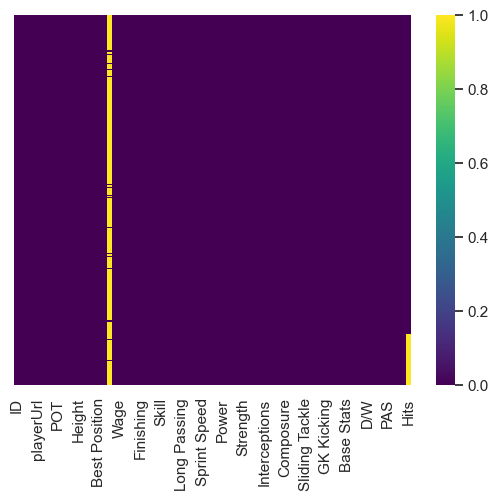

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [7]:
round((df.isnull().sum() * 100/ len(df)),2).sort_values(ascending=False)

Loan Date End    94.66
Hits             13.64
Short Passing     0.05
Long Shots        0.04
Volleys           0.04
                 ...  
Height            0.00
Vision            0.00
Positions         0.00
Contract          0.00
ID                0.00
Length: 77, dtype: float64

In [8]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [9]:
'''
Sub Tasks
1. Extract the player names from the PlayerUrl column and create a new column name Player
Name from the extracts
2. Create a new column titled Player Status from the CONTRACT column with 3 labels ;
a. 'Active' If the player has an active contract
b. 'Free', if the player is free
c. 'On Loan' if the player is on loan
3. Unpack the POSITIONS column into as many columns as there are positions and assign Boolean
values in the columns for each player as appropriate. Name the columns the play position
4. Weight and Height, W/F, SM and IR Columns: convert to integers
5. Value, Wage and Release Clause columns: convert to Float
6. Inspect the HITS column and ensure its float
7. Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into
which you convert the respective values into clusters/labels as follows
a. Height: Bucket intervals of 10 years
b. Weight: Bucket intervals of 10 kg
c. Wage: bucket intervals of 50K
d. Value: bucket intervals of 50M
e. Release Clause: bucket intervals of 50M 
'''

"\nSub Tasks\n1. Extract the player names from the PlayerUrl column and create a new column name Player\nName from the extracts\n2. Create a new column titled Player Status from the CONTRACT column with 3 labels ;\na. 'Active' If the player has an active contract\nb. 'Free', if the player is free\nc. 'On Loan' if the player is on loan\n3. Unpack the POSITIONS column into as many columns as there are positions and assign Boolean\nvalues in the columns for each player as appropriate. Name the columns the play position\n4. Weight and Height, W/F, SM and IR Columns: convert to integers\n5. Value, Wage and Release Clause columns: convert to Float\n6. Inspect the HITS column and ensure its float\n7. Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into\nwhich you convert the respective values into clusters/labels as follows\na. Height: Bucket intervals of 10 years\nb. Weight: Bucket intervals of 10 kg\nc. Wage: bucket intervals of 50K\nd. Value: bucket 

##
TASK 1
1. Extract the player names from the PlayerUrl column and create a new column name Player
Name from the extracts

In [10]:
#Inspecting the PlayerUrl column 

In [11]:
df['playerUrl'].isna().sum()

0

In [12]:
df['playerUrl'].values[910]

'http://sofifa.com/player/230938/franck-yannick-kessie/210006/'

In [13]:
df['playerUrl'].values[910].split('/')[-3]

'franck-yannick-kessie'

In [14]:
#Splitting the PlayerUrl column

playerList = []

for item in df['playerUrl'].values:
    player = item.split('/')[-3]
    player = player.replace('-', ' ')
    playerList.append(player) 
    

In [15]:
#Capitalizing the Items of the playerList

playerList = [item.title() for item in playerList]

In [16]:
playerList

['Lionel Messi',
 'C Ronaldo Dos Santos Aveiro',
 'Jan Oblak',
 'Kevin De Bruyne',
 'Neymar Da Silva Santos Jr',
 'Robert Lewandowski',
 'Mohamed Salah',
 'Alisson Ramses Becker',
 'Kylian Mbappe',
 'Marc Andre Ter Stegen',
 'Virgil Van Dijk',
 'Sadio Mane',
 'Carlos Henrique Venancio Casimiro',
 'Thibaut Courtois',
 'Manuel Neuer',
 'Karim Benzema',
 'Sergio Ramos Garcia',
 'Sergio Aguero',
 'Raheem Sterling',
 'Ngolo Kante',
 'Joshua Kimmich',
 'Paulo Dybala',
 'Ederson Santana De Moraes',
 'Harry Kane',
 'Samir Handanovic',
 'Kalidou Koulibaly',
 'Eden Hazard',
 'Toni Kroos',
 'Antoine Griezmann',
 'Jadon Sancho',
 'Trent Alexander Arnold',
 'Bernardo Mota Carvalho E Silva',
 'Andrew Robertson',
 'Aymeric Laporte',
 'Bruno Miguel Borges Fernandes',
 'Fabio Henrique Tavares',
 'Heung Min Son',
 'Roberto Firmino Barbosa De Oliveira',
 'Keylor Navas',
 'Giorgio Chiellini',
 'Sergio Busquets Burgos',
 'Pierre Emerick Aubameyang',
 'Wojciech Szczesny',
 'Angel Di Maria',
 'Luka Modric',


In [17]:
#Adding the playerList to th dataframe as playerName

df['playerName'] = playerList 

In [18]:
'''
TASK 2:
    Create a new column titled Player Status from the CONTRACT column with 3 labels ;
a. 'Active' If the player has an active contract
b. 'Free', if the player is free
c. 'On Loan' if the player is on loan
'''

"\nTASK 2:\n    Create a new column titled Player Status from the CONTRACT column with 3 labels ;\na. 'Active' If the player has an active contract\nb. 'Free', if the player is free\nc. 'On Loan' if the player is on loan\n"

## Inspecting the Contract column

In [19]:
df['Contract'].isna().sum()

0

In [20]:
df['Contract'].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [21]:
#Categorizing the contract unique values into 3 labels

contList = []

for item in df['Contract'].values:
    if 'Free' in item:
        contList.append('Free')
    elif 'On Loan' in item:
        contList.append('On Loan')
    else:
        contList.append('Active')
        

In [22]:
contList

['Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',

In [23]:
#Adding contList to the dataframe as playerStatus
 
df['playerStatus'] = contList

In [24]:
'''
TASK 3:
    3. Unpack the POSITIONS column into as many columns as there are positions and assign Boolean
values in the columns for each player as appropriate. Name the columns the play position 
'''

'\nTASK 3:\n    3. Unpack the POSITIONS column into as many columns as there are positions and assign Boolean\nvalues in the columns for each player as appropriate. Name the columns the play position \n'

## Inspecting the Position column

In [25]:
df['Positions'].isna().sum()

0

In [26]:
df['Positions']

0        RW, ST, CF
1            ST, LW
2                GK
3           CAM, CM
4           LW, CAM
            ...    
19016            CB
19017            CM
19018            CM
19019            RW
19020        CB, LB
Name: Positions, Length: 19021, dtype: object

In [27]:
#df['Positions'][126]

In [28]:
df['Positions'].unique()

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

In [29]:
posList = []

for val in df.Positions:
    if ',' in val: # if comma exists in string it means player plays multiple positions
        pList = val.split(',')
        playPos = [x.strip() for x in pList]
        posList.extend(playPos)

    else:
        val.strip()
        posList.append(val)

In [30]:
posList 

['RW',
 'ST',
 'CF',
 'ST',
 'LW',
 'GK',
 'CAM',
 'CM',
 'LW',
 'CAM',
 'ST',
 'RW',
 'GK',
 'ST',
 'LW',
 'RW',
 'GK',
 'CB',
 'LW',
 'CDM',
 'GK',
 'GK',
 'CF',
 'ST',
 'CB',
 'ST',
 'LW',
 'RW',
 'CDM',
 'CM',
 'CDM',
 'RB',
 'CF',
 'CAM',
 'GK',
 'ST',
 'GK',
 'CB',
 'LW',
 'ST',
 'CM',
 'ST',
 'CF',
 'LW',
 'RM',
 'LM',
 'CAM',
 'RB',
 'RW',
 'CAM',
 'CM',
 'LB',
 'CB',
 'CAM',
 'CM',
 'CDM',
 'LM',
 'CF',
 'CF',
 'GK',
 'CB',
 'CDM',
 'CM',
 'ST',
 'LW',
 'GK',
 'RW',
 'LW',
 'CM',
 'ST',
 'GK',
 'ST',
 'CAM',
 'RM',
 'RW',
 'GK',
 'RB',
 'CB',
 'CM',
 'CDM',
 'CM',
 'CDM',
 'ST',
 'CB',
 'CB',
 'GK',
 'CAM',
 'CM',
 'CAM',
 'CF',
 'ST',
 'LB',
 'CDM',
 'CM',
 'CDM',
 'CM',
 'CM',
 'CDM',
 'CAM',
 'CF',
 'LW',
 'CAM',
 'CAM',
 'RM',
 'CF',
 'CB',
 'CB',
 'LM',
 'ST',
 'GK',
 'RM',
 'LM',
 'RW',
 'LM',
 'CAM',
 'RW',
 'CB',
 'CB',
 'CDM',
 'RW',
 'RM',
 'RB',
 'ST',
 'LW',
 'CM',
 'ST',
 'CM',
 'LW',
 'CF',
 'CB',
 'CB',
 'CM',
 'RM',
 'LM',
 'GK',
 'ST',
 'LB',
 'LM',
 'CM',
 'C

In [31]:
# List of the possible position
 
pos = list(set(posList))

In [32]:
pos

['LW',
 'CM',
 'LWB',
 'CB',
 'RW',
 'LB',
 'RM',
 'RB',
 'LM',
 'CDM',
 'GK',
 'ST',
 'CF',
 'RWB',
 'CAM']

In [33]:
# Indicating the posible position played from the available positions

playerPos = []

for positions in df.Positions.values:
    posTable = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for p in pos:
        if p in positions:
            Pidx = pos.index(p)
            posTable[Pidx] = 1
    playerPos.append(posTable)    

In [34]:
playerPos

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [35]:
# converting the postions list to a dataframe

dfPos = pd.DataFrame(playerPos, columns = pos) 

In [36]:
dfPos

,LW,CM,LWB,CB,RW,LB,RM,RB,LM,CDM,GK,ST,CF,RWB,CAM
0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
19017,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19019,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [37]:
# merging the play positions table with the original dataframe

df = df.join(dfPos)

In [38]:
'''
TASK 4:
    Weight and Height, W/F, SM and IR Columns: convert to integers 
'''

'\nTASK 4:\n    Weight and Height, W/F, SM and IR Columns: convert to integers \n'

## Inspecting w/f, SM and IR

In [39]:
df[['W/F', 'SM', 'IR']]

,W/F,SM,IR
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★
...,...,...,...
19016,2 ★,2★,1 ★
19017,2 ★,2★,1 ★
19018,2 ★,2★,1 ★
19019,3 ★,2★,1 ★


In [40]:
df[['W/F', 'SM', 'IR']].isna().sum()

W/F    0
SM     0
IR     0
dtype: int64

In [41]:
# Extracting 'W/F', 'SM', 'IR'

starList = []
for x1, x2, x3 in zip(df['W/F'].values, df['SM'].values, df['IR'].values):
    
    starList.append([x1[0],x2[0],x3[0]])

In [42]:
starList

[['4', '4', '5'],
 ['4', '5', '5'],
 ['3', '1', '3'],
 ['5', '4', '4'],
 ['5', '5', '5'],
 ['4', '4', '4'],
 ['3', '4', '3'],
 ['3', '1', '3'],
 ['4', '5', '3'],
 ['4', '1', '3'],
 ['3', '2', '3'],
 ['4', '4', '3'],
 ['3', '2', '3'],
 ['3', '1', '4'],
 ['4', '1', '5'],
 ['4', '4', '4'],
 ['3', '3', '4'],
 ['4', '4', '4'],
 ['3', '4', '3'],
 ['3', '2', '3'],
 ['4', '3', '3'],
 ['3', '4', '3'],
 ['3', '1', '2'],
 ['4', '3', '3'],
 ['3', '1', '3'],
 ['3', '2', '3'],
 ['4', '4', '4'],
 ['5', '3', '4'],
 ['3', '4', '4'],
 ['3', '5', '3'],
 ['4', '3', '2'],
 ['3', '4', '2'],
 ['2', '3', '3'],
 ['3', '2', '2'],
 ['4', '4', '2'],
 ['2', '3', '3'],
 ['5', '4', '3'],
 ['4', '5', '3'],
 ['3', '1', '3'],
 ['3', '2', '4'],
 ['3', '3', '4'],
 ['4', '4', '3'],
 ['3', '1', '3'],
 ['2', '5', '4'],
 ['4', '4', '4'],
 ['4', '3', '5'],
 ['1', '1', '4'],
 ['4', '3', '3'],
 ['4', '3', '4'],
 ['3', '1', '4'],
 ['3', '3', '3'],
 ['3', '2', '3'],
 ['4', '4', '3'],
 ['4', '5', '4'],
 ['3', '3', '3'],
 ['3', '2'

In [43]:
starDF=pd.DataFrame(starList, columns=['W/F2', 'SM2', 'IR2'])

In [44]:
starDF

,W/F2,SM2,IR2
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
19016,2,2,1
19017,2,2,1
19018,2,2,1
19019,3,2,1


In [45]:
starDF.dtypes

W/F2    object
SM2     object
IR2     object
dtype: object

In [46]:
# converting 'W/F', 'SM', 'IR' to int

starDF[['W/F2', 'SM2', 'IR2']]=starDF[['W/F2', 'SM2', 'IR2']].astype(int)

In [47]:
starDF.dtypes

W/F2    int32
SM2     int32
IR2     int32
dtype: object

In [48]:
# Joining starDF with the original dataframe 

df = df.join(starDF) 

## Inspecting weight

In [49]:
df['Weight'].isna().sum()

1

In [50]:
# Calculating the mode of the 'Weight' column

mode_value = df['Weight'].mode()[0]

# Filling  NaN values with the mode value

df['Weight'].fillna(value=mode_value, inplace=True)

In [51]:
df['Weight'].isna().sum()

0

In [52]:
df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [53]:
# Keeping 'kg' as the unit 

wList = []

for val in df['Weight'].values:
    val = str(val)
    if 'kg' in val:
        #print(val)
        #print(val[:-2])
        wList.append(float(val[:-2]))
    elif 'lbs'in val:
        wList.append(float(val[:-3])*0.453592) # converting lbs to kg
    else:
        wList.append(float(0)) #To provide for the posibility of any character or entries with no unit

In [54]:
wList

[72.0,
 83.0,
 87.0,
 70.0,
 68.0,
 80.0,
 71.0,
 91.0,
 73.0,
 85.0,
 92.0,
 69.0,
 84.0,
 96.0,
 92.0,
 81.0,
 82.0,
 70.0,
 69.0,
 70.0,
 73.0,
 75.0,
 86.0,
 89.0,
 92.0,
 89.0,
 74.0,
 76.0,
 73.0,
 76.0,
 69.0,
 64.0,
 64.0,
 85.0,
 69.0,
 78.0,
 78.0,
 76.0,
 80.0,
 85.0,
 76.0,
 80.0,
 90.0,
 69.0,
 66.0,
 83.0,
 82.0,
 85.0,
 75.0,
 82.0,
 73.0,
 81.0,
 60.0,
 84.0,
 74.0,
 85.0,
 94.0,
 79.0,
 67.0,
 68.0,
 68.0,
 80.0,
 82.0,
 76.0,
 78.0,
 83.0,
 89.0,
 80.0,
 70.0,
 90.0,
 75.0,
 75.0,
 65.0,
 81.0,
 75.0,
 67.0,
 70.0,
 76.0,
 74.0,
 75.0,
 74.0,
 59.0,
 81.0,
 79.0,
 75.0,
 82.0,
 94.0,
 80.0,
 70.0,
 70.0,
 76.0,
 86.0,
 85.0,
 61.0,
 74.0,
 78.0,
 69.0,
 72.0,
 71.0,
 74.0,
 79.0,
 93.0,
 83.0,
 79.0,
 81.0,
 88.0,
 71.0,
 75.0,
 69.0,
 73.0,
 97.0,
 71.0,
 76.0,
 84.0,
 76.0,
 75.0,
 77.0,
 68.0,
 65.0,
 81.0,
 68.0,
 74.0,
 85.0,
 79.0,
 73.0,
 72.0,
 79.0,
 78.0,
 66.0,
 62.0,
 67.0,
 70.0,
 78.0,
 67.0,
 78.0,
 77.0,
 80.0,
 89.0,
 81.0,
 84.0,
 77.0,
 60.0,
 73.0,

In [55]:
df['wt_kg'] = wList

In [56]:
df['wt_kg'].dtypes

dtype('float64')

In [57]:
# Converting the data tyoe to int

df['wt_kg'] = df['wt_kg'].astype(int)

In [58]:
df['wt_kg'].dtypes

dtype('int32')

## Inspecting height

In [59]:
df.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [60]:
df['Height'].isna().sum()

0

In [61]:
# Keeping the height in cm

hgtList = []

for val in df['Height'].values:
    val = str(val) #change to string to be able to use string method 'in'
    if 'cm' in val:
        ht = float(val[:-2]) #converting back to float
        hgtList.append(ht)
    else:
        ft = val[0]
        inch = val[-2]
        # converting to cm
        hgt1 = float(ft)*30.48 + float(inch)*2.54
        hgtList.append(hgt1)


In [62]:
hgtList

[170.0,
 187.0,
 188.0,
 181.0,
 175.0,
 184.0,
 175.0,
 191.0,
 178.0,
 187.0,
 193.0,
 175.0,
 185.0,
 199.0,
 193.0,
 185.0,
 184.0,
 173.0,
 170.0,
 168.0,
 176.0,
 177.0,
 188.0,
 188.0,
 193.0,
 187.0,
 175.0,
 183.0,
 176.0,
 180.0,
 180.0,
 173.0,
 178.0,
 189.0,
 179.0,
 188.0,
 183.0,
 181.0,
 185.0,
 187.0,
 189.0,
 187.0,
 195.0,
 180.0,
 172.0,
 182.0,
 188.0,
 185.0,
 186.0,
 192.0,
 173.0,
 191.0,
 165.0,
 191.0,
 179.0,
 194.0,
 191.0,
 183.0,
 173.0,
 167.0,
 170.0,
 182.0,
 191.0,
 191.0,
 176.0,
 188.0,
 189.0,
 188.0,
 186.0,
 196.0,
 175.0,
 184.0,
 181.0,
 186.0,
 183.0,
 179.0,
 175.0,
 180.0,
 182.0,
 181.0,
 180.0,
 163.0,
 186.0,
 183.0,
 176.0,
 190.0,
 191.0,
 180.0,
 174.0,
 183.0,
 181.0,
 191.0,
 190.0,
 169.0,
 183.0,
 187.0,
 175.0,
 178.0,
 180.0,
 183.0,
 185.0,
 190.0,
 185.0,
 181.0,
 174.0,
 194.0,
 181.0,
 179.0,
 171.0,
 171.0,
 195.0,
 170.0,
 184.0,
 190.0,
 189.0,
 184.0,
 185.0,
 170.0,
 172.0,
 188.0,
 181.0,
 178.0,
 187.0,
 190.0,
 178.0,


In [63]:
df['hg_cm']=hgtList

In [64]:
df['hg_cm'].dtypes

dtype('float64')

In [65]:
df['hg_cm'] = df['hg_cm'].astype(int)

In [66]:
df['hg_cm'].dtypes

dtype('int32')

In [67]:
'''
TASK 5
# Value, Wage and Release Clause columns: convert to Float 
'''

'\nTASK 5\n# Value, Wage and Release Clause columns: convert to Float \n'

## Inspecting Value, Wage and Release Clause

In [68]:
df['Value'].isna().sum()

0

In [69]:
df['Value'].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [70]:
# Extracting Value

valList = [] # thousands

for val in df['Value']:
    if 'K' or 'K' in val:
        val = val[1:-1]
        val = pd.to_numeric(val) #Convert str to numeric type first
        val = float(val)*1000
        valList.append(val)
    elif 'M' or 'm' in val:
        val = val[1:-1]
        val = pd.to_numeric(val)
        val = float(val)*1000000
        valList.append(val)
    elif '€' in val:
        val = val[1:]
        val = pd.to_numeric(val)
        val = float(val)*1000000
        valList.append(val)
    else:
        valList.append(float(val))

In [71]:
valList

[103500.0,
 63000.0,
 120000.0,
 129000.0,
 132000.0,
 111000.0,
 120500.0,
 102000.0,
 185500.0,
 110000.0,
 113000.0,
 120500.0,
 90500.0,
 82000.0,
 17500.0,
 83500.0,
 33500.0,
 83500.0,
 114500.0,
 78000.0,
 103000.0,
 109000.0,
 92000.0,
 109000.0,
 10000.0,
 76500.0,
 89500.0,
 87500.0,
 79500.0,
 124000.0,
 114000.0,
 95000.0,
 90500.0,
 92500.0,
 105500.0,
 88500.0,
 85000.0,
 81500.0,
 26000.0,
 21000.0,
 56000.0,
 67500.0,
 53000.0,
 63000.0,
 36500.0,
 51000.0,
 26000.0,
 78000.0,
 65500.0,
 46500.0,
 61500.0,
 72500.0,
 77500.0,
 77500.0,
 43500.0,
 32500.0,
 46500.0,
 36000.0,
 32000.0,
 54000.0,
 49500.0,
 57000.0,
 66500.0,
 74500.0,
 71500.0,
 121000.0,
 99000.0,
 67000.0,
 86500.0,
 93500.0,
 70000.0,
 81500.0,
 62000.0,
 67000.0,
 66000.0,
 53000.0,
 58000.0,
 74500.0,
 44000.0,
 63000.0,
 81000.0,
 53000.0,
 37000.0,
 14500.0,
 54000.0,
 46000.0,
 63000.0,
 47500.0,
 52500.0,
 46500.0,
 54500.0,
 36000.0,
 26000.0,
 34500.0,
 57500.0,
 17500.0,
 52500.0,
 51500.0,
 

In [72]:
df['valueInPound']=valList

In [73]:
df['valueInPound'].dtypes

dtype('float64')

In [74]:
df['Wage'].isna().sum()

0

In [75]:
df['Wage'].unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [76]:
# Extracting wage 

wageList = []

for w in df.Wage:
    if 'K' in w:
        w = w[1:-1]
        wageList.append(float(w)*1000)
    elif '€' in w:
        w = w[1:]
        wageList.append(float(w))
    else:
        wageList.append(float(w))

In [77]:
wageList

[560000.0,
 220000.0,
 125000.0,
 370000.0,
 270000.0,
 240000.0,
 250000.0,
 160000.0,
 160000.0,
 260000.0,
 210000.0,
 250000.0,
 310000.0,
 250000.0,
 130000.0,
 350000.0,
 300000.0,
 300000.0,
 270000.0,
 190000.0,
 145000.0,
 190000.0,
 195000.0,
 220000.0,
 100000.0,
 140000.0,
 350000.0,
 310000.0,
 290000.0,
 82000.0,
 110000.0,
 230000.0,
 155000.0,
 200000.0,
 195000.0,
 155000.0,
 165000.0,
 190000.0,
 110000.0,
 95000.0,
 240000.0,
 170000.0,
 105000.0,
 160000.0,
 260000.0,
 115000.0,
 125000.0,
 125000.0,
 130000.0,
 150000.0,
 230000.0,
 220000.0,
 135000.0,
 190000.0,
 160000.0,
 220000.0,
 95000.0,
 55000.0,
 58000.0,
 100000.0,
 220000.0,
 140000.0,
 145000.0,
 95000.0,
 115000.0,
 105000.0,
 81000.0,
 130000.0,
 150000.0,
 34000.0,
 100000.0,
 100000.0,
 140000.0,
 190000.0,
 115000.0,
 210000.0,
 120000.0,
 135000.0,
 59000.0,
 135000.0,
 190000.0,
 120000.0,
 130000.0,
 95000.0,
 90000.0,
 105000.0,
 165000.0,
 120000.0,
 150000.0,
 170000.0,
 155000.0,
 65000.0,


In [78]:
df['wageInPound']=wageList

In [79]:
df['wageInPound'].dtypes

dtype('float64')

In [80]:
list(df['Release Clause'].unique())

['€138.4M',
 '€75.9M',
 '€159.4M',
 '€161M',
 '€166.5M',
 '€132M',
 '€144.3M',
 '€120.3M',
 '€203.1M',
 '€147.7M',
 '€145.3M',
 '€122M',
 '€119M',
 '€47.9M',
 '€108.7M',
 '€50.2M',
 '€98.1M',
 '€139.6M',
 '€96.9M',
 '€112.1M',
 '€122.5M',
 '€103M',
 '€140.2M',
 '€27.2M',
 '€85M',
 '€118.9M',
 '€112.8M',
 '€103.5M',
 '€132.1M',
 '€115.5M',
 '€102M',
 '€107.8M',
 '€124.4M',
 '€104.9M',
 '€99.8M',
 '€96.2M',
 '€50M',
 '€25.6M',
 '€77.9M',
 '€85.5M',
 '€56.1M',
 '€72.2M',
 '€64.6M',
 '€51.3M',
 '€82.5M',
 '€69.3M',
 '€59.9M',
 '€98.8M',
 '€96.3M',
 '€53.2M',
 '€43.1M',
 '€48.5M',
 '€47.3M',
 '€58.7M',
 '€65.6M',
 '€67.5M',
 '€84.7M',
 '€87M',
 '€95.8M',
 '€119.7M',
 '€91.6M',
 '€79M',
 '€111.3M',
 '€78.9M',
 '€81.9M',
 '€88.8M',
 '€86.9M',
 '€94.6M',
 '€69.4M',
 '€78M',
 '€97.8M',
 '€86.6M',
 '€107.3M',
 '€63.8M',
 '€54.2M',
 '€21.9M',
 '€66.2M',
 '€79.9M',
 '€52M',
 '€68.5M',
 '€56.4M',
 '€66.3M',
 '€44.2M',
 '€29.7M',
 '€40.8M',
 '€68.9M',
 '€24.7M',
 '€72.8M',
 '€57.8M',
 '€72.1M',
 '€7

In [81]:
df['Release Clause'].dtypes

dtype('O')

In [82]:
df['Release Clause'].isna().sum()

3

In [83]:
# Calculate the mode of the 'Weight' column (most frequent value)
mode_value = df['Release Clause'].mode()[0]

# Fill NaN values with the mode value
df['Release Clause'].fillna(value=mode_value, inplace=True)

In [84]:
df['Release Clause'].isna().sum()

0

In [85]:
#Extracting Release Clause

rvalList = []

for val in df['Release Clause'].values:
    val = str(val) #Release Clause values are object and need to be converted to string to use stringe methods 
    if 'K' in val:
        val = float(val[1:-1])*1000
        rvalList.append(val)
    elif 'M' in val:
        val = float(val[1:-1])*1000000
        rvalList.append(val)
    elif '€' in val:
        val = float(val[1:])
        rvalList.append(val)
    else:
        rvalList.append(0)

In [86]:
rvalList

[138400000.0,
 75900000.0,
 159400000.0,
 161000000.0,
 166500000.0,
 132000000.0,
 144300000.0,
 120300000.0,
 203100000.0,
 147700000.0,
 145300000.0,
 144300000.0,
 122000000.0,
 119000000.0,
 47900000.0,
 108700000.0,
 50200000.0,
 98100000.0,
 139600000.0,
 96900000.0,
 112100000.0,
 122500000.0,
 103000000.0,
 140200000.0,
 27200000.0,
 85000000.0,
 118900000.0,
 112800000.0,
 103500000.0,
 132100000.0,
 115500000.0,
 115500000.0,
 102000000.0,
 107800000.0,
 124400000.0,
 104900000.0,
 99800000.0,
 96200000.0,
 50000000.0,
 25600000.0,
 77900000.0,
 85500000.0,
 56100000.0,
 72200000.0,
 50200000.0,
 64599999.99999999,
 51300000.0,
 82500000.0,
 69300000.0,
 59900000.0,
 77900000.0,
 98800000.0,
 96300000.0,
 98800000.0,
 53200000.0,
 43100000.0,
 56100000.0,
 48500000.0,
 47300000.0,
 58700000.0,
 65599999.99999999,
 67500000.0,
 84700000.0,
 87000000.0,
 95800000.0,
 119700000.0,
 91600000.0,
 79000000.0,
 111300000.0,
 78900000.0,
 81900000.0,
 88800000.0,
 86900000.0,
 94600

In [87]:
df['releaseInPound']=rvalList

In [88]:
df['releaseInPound'].dtypes

dtype('float64')

In [89]:
df.Hits.unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [90]:
df['Hits'].isna().sum()

2595

In [91]:
df['Hits'].dtypes

dtype('O')

In [92]:
# Extracting Hits

hList = []

for val in df.Hits:
    val = str(val)
    if 'K' in val:
        val = float(val[:-1])*1000
        hList.append(val)
    elif val.isnumeric():
        hList.append(float(val))
        '''elif val.isdigit() or val.isalnum():
        print(val)'''
    elif 'n' in val:
        hList.append(np.nan)
    else:
        float(val)
        hList.append(float(val))



In [93]:
hList

[771.0,
 562.0,
 150.0,
 207.0,
 595.0,
 248.0,
 246.0,
 120.0,
 1600.0,
 130.0,
 321.0,
 189.0,
 175.0,
 96.0,
 118.0,
 216.0,
 212.0,
 154.0,
 205.0,
 202.0,
 339.0,
 408.0,
 103.0,
 332.0,
 86.0,
 173.0,
 246.0,
 161.0,
 396.0,
 1100.0,
 433.0,
 242.0,
 206.0,
 177.0,
 1500.0,
 198.0,
 459.0,
 173.0,
 117.0,
 130.0,
 119.0,
 209.0,
 84.0,
 187.0,
 165.0,
 203.0,
 65.0,
 336.0,
 126.0,
 313.0,
 124.0,
 154.0,
 145.0,
 538.0,
 182.0,
 175.0,
 101.0,
 45.0,
 103.0,
 377.0,
 99.0,
 194.0,
 161.0,
 403.0,
 414.0,
 593.0,
 374.0,
 245.0,
 3200.0,
 266.0,
 299.0,
 309.0,
 215.0,
 265.0,
 211.0,
 112.0,
 203.0,
 337.0,
 70.0,
 159.0,
 688.0,
 116.0,
 63.0,
 144.0,
 123.0,
 71.0,
 224.0,
 113.0,
 175.0,
 130.0,
 168.0,
 61.0,
 89.0,
 137.0,
 278.0,
 75.0,
 148.0,
 176.0,
 197.0,
 264.0,
 214.0,
 182.0,
 247.0,
 402.0,
 440.0,
 1700.0,
 2300.0,
 171.0,
 320.0,
 266.0,
 211.0,
 203.0,
 657.0,
 87.0,
 259.0,
 200.0,
 255.0,
 113.0,
 171.0,
 253.0,
 182.0,
 196.0,
 60.0,
 161.0,
 97.0,
 85.0,
 1

In [94]:
df['hitNew']=hList

In [95]:
df['hitNew'].dtypes

dtype('float64')

In [96]:
df['hitNew'].isna().sum()

2595

In [97]:
'''
Task 7:
    
    Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into
which you convert the respective values into clusters/labels as follows
a. Height: Bucket intervals of 10 cm
b. Weight: Bucket intervals of 10 kg
c. Wage: bucket intervals of 50K
d. Value: bucket intervals of 50M
e. Release Clause: bucket intervals of 50M 
'''

'\nTask 7:\n    \n    Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into\nwhich you convert the respective values into clusters/labels as follows\na. Height: Bucket intervals of 10 cm\nb. Weight: Bucket intervals of 10 kg\nc. Wage: bucket intervals of 50K\nd. Value: bucket intervals of 50M\ne. Release Clause: bucket intervals of 50M \n'

## Binning Process

In [98]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus,LW,CM,LWB,CB,RW,LB,RM,RB,LM,CDM,GK,ST,CF,RWB,CAM,W/F2,SM2,IR2,wt_kg,hg_cm,valueInPound,wageInPound,releaseInPound,hitNew
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,Lionel Messi,Active,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,4,4,5,72,170,103500.0,560000.0,138400000.0,771.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,C Ronaldo Dos Santos Aveiro,Active,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,5,5,83,187,63000.0,220000.0,75900000.0,562.0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,Jan Oblak,Active,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,3,87,188,120000.0,125000.0,159400000.0,150.0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,Kevin De Bruyne,Active,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5,4,4,70,181,129000.0,370000.0,161000000.0,207.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,Neymar Da Silva Santos Jr,Active,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,5,5,68,175,132000.0,270000.0,166500000.0,595.0
...,...,...,...

In [99]:
#Extracting the column to be binned 

df[['hg_cm',"wt_kg",'wageInPound','valueInPound','releaseInPound']]

,hg_cm,wt_kg,wageInPound,valueInPound,releaseInPound
0,170,72,560000.0,103500.0,138400000.0
1,187,83,220000.0,63000.0,75900000.0
2,188,87,125000.0,120000.0,159400000.0
3,181,70,370000.0,129000.0,161000000.0
4,175,68,270000.0,132000.0,166500000.0
...,...,...,...,...,...
19016,178,66,1000.0,100000.0,70000.0
19017,175,65,500.0,130000.0,165000.0
19018,179,74,500.0,120000.0,131000.0
19019,175,69,2000.0,100000.0,88000.0


In [100]:
#Binning hg_cm : Bucket intervals of 10 cm

In [101]:
Upperbands1 = []

count = 1

while count <= max(df['hg_cm'])/10:
    Upperbands1.append(10*count)
    count+=1

In [102]:
#Upperbands1

In [103]:
df['hgt_bins'] = pd.cut(x=df['hg_cm'], bins=Upperbands1)

In [104]:
df['hgt_bins'].isna().sum()

20

In [105]:
list(df.hgt_bins.unique())

[Interval(160.0, 170.0, closed='right'),
 Interval(180.0, 190.0, closed='right'),
 Interval(170.0, 180.0, closed='right'),
 Interval(190.0, 200.0, closed='right'),
 Interval(150.0, 160.0, closed='right'),
 nan]

In [106]:
#Binning wt_kg: Bucket intervals of 10 kg

In [107]:
Upperbands2 = []

count = 1

while count <= max(df['wt_kg'])/10:
    Upperbands2.append(10*count)
    count+=1

In [108]:
#Upperbands2 

In [109]:
df['wt_bins'] = pd.cut(x=df['wt_kg'], bins=Upperbands2)

In [110]:
list(df['wt_bins'].unique())

[Interval(70, 80, closed='right'),
 Interval(80, 90, closed='right'),
 Interval(60, 70, closed='right'),
 Interval(90, 100, closed='right'),
 Interval(50, 60, closed='right'),
 Interval(100, 110, closed='right'),
 Interval(40, 50, closed='right')]

In [111]:
df['wt_bins'].isna().sum()

0

In [112]:
#Binning wageInPound: bucket intervals of 50K

In [113]:
Upperbands3 = []

count = 1

while count <= max(df['wageInPound'])/50000:
    Upperbands3.append(50000*count)
    count+=1

In [114]:
#Upperbands3 

In [115]:
df['wageInPound_bins'] = pd.cut(x=df['wageInPound'], bins=Upperbands3)

In [116]:
list(df['wageInPound_bins'].unique())

[nan,
 Interval(200000.0, 250000.0, closed='right'),
 Interval(100000.0, 150000.0, closed='right'),
 Interval(350000.0, 400000.0, closed='right'),
 Interval(250000.0, 300000.0, closed='right'),
 Interval(150000.0, 200000.0, closed='right'),
 Interval(300000.0, 350000.0, closed='right'),
 Interval(50000.0, 100000.0, closed='right')]

In [117]:
df['wageInPound_bins'].isna().sum()

18452

In [118]:
#Binning valueInPound: bucket intervals of 50M

In [119]:
Upperbands4 = []

count = 1

while count <= max(df['valueInPound'])/50000000:
    Upperbands4.append(50000000*count)
    count+=1

In [120]:
Upperbands4 

[]

In [121]:
df['valueInPound_bins'] = pd.cut(x=df['valueInPound'], bins=Upperbands4)

In [122]:
list(df['valueInPound_bins'].unique())

[nan]

In [123]:
df['valueInPound_bins'].isna().sum()

19021

In [124]:
#Binning releaseInPound: bucket intervals of 50M 

In [125]:
Upperbands5 = []

count = 1

while count <= max(df['releaseInPound'])/50000000:
    Upperbands5.append(50000000*count)
    count+=1

In [126]:
#Upperbands5 

In [127]:
df['releaseInPound_bins'] = pd.cut(x=df['releaseInPound'], bins=Upperbands5)

In [128]:
list(df['releaseInPound_bins'].unique())

[Interval(100000000.0, 150000000.0, closed='right'),
 Interval(50000000.0, 100000000.0, closed='right'),
 Interval(150000000.0, 200000000.0, closed='right'),
 nan]

In [129]:
df['releaseInPound_bins'].isna().sum()

18862

In [130]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus,LW,CM,LWB,CB,RW,LB,RM,RB,LM,CDM,GK,ST,CF,RWB,CAM,W/F2,SM2,IR2,wt_kg,hg_cm,valueInPound,wageInPound,releaseInPound,hitNew,hgt_bins,wt_bins,wageInPound_bins,valueInPound_bins,releaseInPound_bins
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,Lionel Messi,Active,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,4,4,5,72,170,103500.0,560000.0,138400000.0,771.0,"(160, 170]","(70, 80]",NaN,NaN,"(100000000.0, 150000000.0]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,C Ronaldo Dos Santos Aveiro,Active,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,5,5,83,187,63000.0,220000.0,75900000.0,562.0,"(180, 190]","(80, 90]","(200000.0, 250000.0]",NaN,"(50000000.0, 100000000.0]"
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,Jan Oblak,Active,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,3,87,188,120000.0,125000.0,159400000.0,150.0,"(180, 190]","(80, 90]","(100000.0, 150000.0]",NaN,"(150000000.0, 200000000.0]"
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,Kevin De Bruyne,Active,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5,4,4,70,181,129000.0,370000.0,161000000.0,207.0,"(180, 190]","(60, 70]","(350000.0, 400000.0]",NaN,"(150000000.0, 200000000.0]"
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,

In [131]:
# Save the DataFrame to a CSV file
df.to_csv('processed_df.csv', index=False)

In [132]:
# Read the processed DataFrame from the CSV file
processed_df = pd.read_csv('processed_df.csv')

In [133]:
processed_df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus,LW,CM,LWB,CB,RW,LB,RM,RB,LM,CDM,GK,ST,CF,RWB,CAM,W/F2,SM2,IR2,wt_kg,hg_cm,valueInPound,wageInPound,releaseInPound,hitNew,hgt_bins,wt_bins,wageInPound_bins,valueInPound_bins,releaseInPound_bins
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,Lionel Messi,Active,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,4,4,5,72,170,103500.0,560000.0,138400000.0,771.0,"(160, 170]","(70, 80]",NaN,NaN,"(100000000, 150000000]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,C Ronaldo Dos Santos Aveiro,Active,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,5,5,83,187,63000.0,220000.0,75900000.0,562.0,"(180, 190]","(80, 90]","(200000, 250000]",NaN,"(50000000, 100000000]"
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,Jan Oblak,Active,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,3,87,188,120000.0,125000.0,159400000.0,150.0,"(180, 190]","(80, 90]","(100000, 150000]",NaN,"(150000000, 200000000]"
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,Kevin De Bruyne,Active,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5,4,4,70,181,129000.0,370000.0,161000000.0,207.0,"(180, 190]","(60, 70]","(350000, 400000]",NaN,"(150000000, 200000000]"
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,8

In [134]:
list(processed_df.columns)

['ID',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 '↓OVA',
 'POT',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'play

## Processing Data for Modeling 

In [135]:
extract= [
 'Age',
 '↓OVA',
 'POT',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'A/W',
 'D/W',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'W/F2',
 'SM2',
 'IR2',
 'wt_kg',
 'hg_cm',
 'valueInPound',
 'wageInPound',
 'releaseInPound',
 'hitNew'
]

In [136]:
# Extracting the useful data

df_model = processed_df[extract]

In [137]:
df_model

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,W/F2,SM2,IR2,wt_kg,hg_cm,valueInPound,wageInPound,releaseInPound,hitNew
0,33,93.0,93.0,Left,93,RW,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,Medium,Low,85.0,92.0,91.0,95.0,38.0,65.0,4,4,5,72,170,103500.0,560000.0,138400000.0,771.0
1,35,92.0,92.0,Right,92,ST,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,High,Low,89.0,93.0,81.0,89.0,35.0,77.0,4,5,5,83,187,63000.0,220000.0,75900000.0,562.0
2,27,91.0,93.0,Right,91,GK,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,Medium,Medium,87.0,92.0,78.0,90.0,52.0,90.0,3,1,3,87,188,120000.0,125000.0,159400000.0,150.0
3,29,91.0,91.0,Right,91,CAM,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,High,High,76.0,86.0,93.0,88.0,64.0,78.0,5,4,4,70,181,129000.0,370000.0,161000000.0,207.0
4,28,91.0,91.0,Right,91,LW,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,High,Medium,91.0,85.0,86.0,94.0,36.0,59.0,5,5,5,68,175,132000.0,270000.0,166500000.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,47.0,55.0,Right,49,CB,145.0,23.0,26.0,43.0,26.0,27.0,142.0,27,23.0,21.0,29.0,42.0,294.0,68.0,60.0,69.0,46.0,51.0,221.0,36.0,57.0,54.0,50.0,24.0,192.0,48,50.0,28.0,28,38.0,44.0,147.0,45.0,52.0,50.0,45.0,7.0,8.0,5.0,14.0,11,1186.0,255,Medium,Medium,64.0,28.0,26.0,38.0,48.0,51.0,2,2,1,66,178,100000.0,1000.0,70000.0,NaN
19017,17,47.0,67.0,Right,51,CAM,211.0,38.0,42.0,40.0,56.0,35.0,219.0,46,40.0,35.0,50.0,48.0,305.0,63.0,64.0,61.0,51.0,66.0,226.0,48.0,58.0,43.0,47.0,30.0,193.0,40,23.0,47.0,47,36.0,38.0,116.0,32.0,44.0,40.0,45.0,12.0,10.0,9.0,6.0,8,1315.0,281,Medium,Medium,64.0,40.0,48.0,49.0,35.0,45.0,2,2,1,65,175,130000.0,500.0,165000.0,NaN
19018,18,47.0,65.0,Right,49,CAM,200.0,30.0,34.0,43.0,54.0,39.0,207.0,43,39.0,31.0,47.0,47.0,290.0,59.0,66.0,51.0,47.0,67.0,242.0,45.0,52.0,50.0,54.0,41.0,230.0,56,42.0,47.0,43,42.0,43.0,121.0,33.0,43.0,45.0,48.0,13.0,12.0,6.0,6.0,11,1338.0,285,Medium,Medium,63.0,39.0,44.0,46.0,40.0,53.0,2,2,1,74,179,120000.0,500.0,131000.0,NaN
19019,20,47.0,57.0,Right,48,ST,215.0,45.0,52.0,34.0,42.0,42.0,194.0,51,35.0,31.0,31.0,46.0,254.0,62.0,55.0,50.0,33.0,54.0,235.0,56.0,45.0,46.0,48.0,40.0,190.0,31,25.0,42.0,46,46.0,45.0,100.0,26.0,32.0,42.0,55.0,14.0,12.0,9.0,8.0,12,1243.0,271,Medium,Medium,58.0,49.0,41.0,49.0,30.0,44.0,3,2,1,69,175,100000.0,2000.0,88000.0,NaN


In [138]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               19021 non-null  int64  
 1   ↓OVA              19019 non-null  float64
 2   POT               19020 non-null  float64
 3   Preferred Foot    19021 non-null  object 
 4   BOV               19021 non-null  int64  
 5   Best Position     19021 non-null  object 
 6   Attacking         19020 non-null  float64
 7   Crossing          19020 non-null  float64
 8   Finishing         19016 non-null  float64
 9   Heading Accuracy  19013 non-null  float64
 10  Short Passing     19012 non-null  object 
 11  Volleys           19014 non-null  float64
 12  Skill             19015 non-null  float64
 13  Dribbling         19020 non-null  object 
 14  Curve             19013 non-null  float64
 15  FK Accuracy       19015 non-null  float64
 16  Long Passing      19018 non-null  float6

In [139]:
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,19021.0,2.519105e+01,4.709833e+00,16.0,21.0,25.0,29.0,53.0
↓OVA,19019.0,6.571003e+01,6.961705e+00,47.0,61.0,66.0,70.0,93.0
POT,19020.0,7.113318e+01,6.114062e+00,47.0,67.0,71.0,75.0,95.0
BOV,19021.0,6.674523e+01,6.741702e+00,48.0,62.0,67.0,71.0,93.0
Attacking,19020.0,2.489213e+02,7.425257e+01,42.0,222.0,263.0,297.0,437.0
Crossing,19020.0,4.968791e+01,1.812142e+01,6.0,38.0,54.0,63.0,94.0
Finishing,19016.0,4.584155e+01,1.955928e+01,3.0,30.0,49.0,62.0,95.0
Heading Accuracy,19013.0,5.193305e+01,1.728413e+01,5.0,44.0,55.0,64.0,93.0
Volleys,19014.0,4.268802e+01,1.763596e+01,3.0,30.0,44.0,56.0,90.0
Skill,19015.0,2.564494e+02,7.859167e+01,40.0,222.0,269.0,310.0,470.0


<AxesSubplot:>

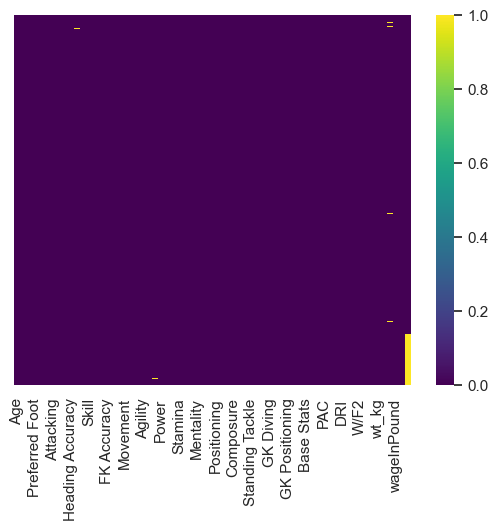

In [140]:
# Visual inspection for NAN value

sns.heatmap(df_model.isnull(), yticklabels=False, cmap="viridis")

In [141]:
# Checking for NAN in ascending order

round((df_model.isnull().sum() * 100/ len(df_model)),2).sort_values(ascending=False)

hitNew           13.64
valueInPound      1.30
Short Passing     0.05
Long Shots        0.04
Balance           0.04
                 ...  
Vision            0.00
Aggression        0.00
A/W               0.00
Base Stats        0.00
Age               0.00
Length: 66, dtype: float64

In [142]:
for col in df_model.columns:
    print(col)
    print(df_model[col].unique())
    print()

Age
[33 35 27 29 28 31 21 34 32 25 26 30 20 24 22 23 19 38 42 36 37 18 17 39
 40 41 16 43 53]

↓OVA
[93. 92. 91. 90. 89. 88. 87. 86. 85. 84. 83. 82. nan 81. 80. 79. 78. 77.
 76. 75. 74. 73. 72. 71. 70. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60. 59.
 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47.]

POT
[93. 92. 91. 90. 95. 89. 88. 87. 86. 85. 84. 83. 82. nan 81. 80. 79. 78.
 77. 76. 75. 74. 73. 72. 71. 70. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60.
 59. 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47.]

Preferred Foot
['Left' 'Right']

BOV
[93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70
 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48]

Best Position
['RW' 'ST' 'GK' 'CAM' 'LW' 'CB' 'CDM' 'CF' 'CM' 'RB' 'LB' 'LM' 'RM' 'LWB'
 'RWB']

Attacking
[429. 437.  95. 407. 408. 423. 392. 114. 118. 316. 410. 349.  86. 119.
 426. 374. 411. 360. 328. 383. 405. 123. 420. 224. 388. 397. 425. 373.
 365. 371. 311. 396. 345. 399. 400.  78. 280. 330. 403. 379. 380.  94.

<AxesSubplot:>

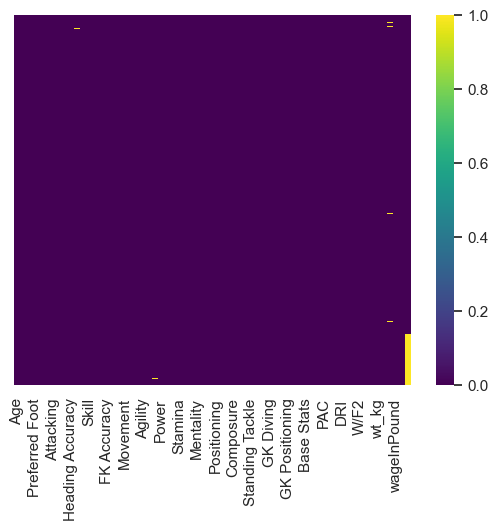

In [143]:
sns.heatmap(df_model.isnull(), yticklabels=False, cmap="viridis")

In [144]:
round((df_model.isnull().sum() * 100/ len(df_model)),2).sort_values(ascending=False)

hitNew           13.64
valueInPound      1.30
Short Passing     0.05
Long Shots        0.04
Balance           0.04
                 ...  
Vision            0.00
Aggression        0.00
A/W               0.00
Base Stats        0.00
Age               0.00
Length: 66, dtype: float64

In [145]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               19021 non-null  int64  
 1   ↓OVA              19019 non-null  float64
 2   POT               19020 non-null  float64
 3   Preferred Foot    19021 non-null  object 
 4   BOV               19021 non-null  int64  
 5   Best Position     19021 non-null  object 
 6   Attacking         19020 non-null  float64
 7   Crossing          19020 non-null  float64
 8   Finishing         19016 non-null  float64
 9   Heading Accuracy  19013 non-null  float64
 10  Short Passing     19012 non-null  object 
 11  Volleys           19014 non-null  float64
 12  Skill             19015 non-null  float64
 13  Dribbling         19020 non-null  object 
 14  Curve             19013 non-null  float64
 15  FK Accuracy       19015 non-null  float64
 16  Long Passing      19018 non-null  float6

In [146]:
df_model['Short Passing']

0          91
1          82
2          43
3          94
4          87
         ... 
19016    26.0
19017    56.0
19018    54.0
19019    42.0
19020    45.0
Name: Short Passing, Length: 19021, dtype: object

In [147]:
df_model['Short Passing'].unique()

array(['91', '82', '43', '94', '87', '84', '45', '83', '61', '79', '85',
       '33', '55', '86', '57', '81', '42', '74', '93', '88', '30', '65',
       '89', '77', '32', '50', '80', '78', '90', '69', '40', '92', '75',
       '73', '34', '76', '35', '70', '37', '23', '44', '38', '48', '26',
       '60', '25', '46', '28', '24', '36', '51', '17', '18', '39', '71',
       '67', '27', '72', '66', '20', '31', '68', '29', '11', '64', '62',
       nan, '41', '63', '19', '54', '16', '69_', '22', '49', '59', '14',
       '58', '15', '21', '52', '56', '53', '12', '47', '13', 58, 65, 70,
       67, 66, 57, 72, 37, 26, 60, 64, 55, 56, 59, 68, 21, 74, 42, 63, 62,
       47, 22, 52, 15, 12, 73, 61, 54, 71, 25, 28, 27, 31, 69, 50, 75, 29,
       36, 41, 32, 53, 48, 30, 11, 35, 16, 51, 18, 43, 19, 34, 33, 23, 38,
       20, 13, 39, 49, 24, 46, 17, 8, 14, 45, 44, 40, 76, 7], dtype=object)

In [148]:
df_model['Short Passing'] = pd.to_numeric(df_model['Short Passing'], errors='coerce').astype(float)

In [149]:
df_model['Short Passing'].dtypes

dtype('float64')

In [150]:
df_model['Short Passing'].unique()

array([91., 82., 43., 94., 87., 84., 45., 83., 61., 79., 85., 33., 55.,
       86., 57., 81., 42., 74., 93., 88., 30., 65., 89., 77., 32., 50.,
       80., 78., 90., 69., 40., 92., 75., 73., 34., 76., 35., 70., 37.,
       23., 44., 38., 48., 26., 60., 25., 46., 28., 24., 36., 51., 17.,
       18., 39., 71., 67., 27., 72., 66., 20., 31., 68., 29., 11., 64.,
       62., nan, 41., 63., 19., 54., 16., 22., 49., 59., 14., 58., 15.,
       21., 52., 56., 53., 12., 47., 13.,  8.,  7.])

In [151]:
df_model['Short Passing'].isnull().sum()

10

In [152]:
 df_model['Short Passing'].fillna(value=df_model['Short Passing'].mean(), inplace=True)

In [153]:
round(df_model['Short Passing'].isnull().sum()) 

0

In [154]:
df_model['Dribbling'].unique()

array(['96', '88', '12', '95', '85', '90', '27', '92', '21', '70', '91',
       '69', '13', '30', '87', '65', '79', '83', '23', '80', '18', '93',
       '77', '63', '76', '16', '59', '81', '11', '84', '10', '75', '78',
       '55', '15', '86', '66', '67', '28', '57', '64', '82', '62', '19',
       '53', '72', '50', '26', '43', '89', '73', '20', '14', '68', '71',
       '74', '22', '54', '56', '61', '9', '24', '60', '25', '8', '17',
       '47', '58', '46', '42', '51', '52', '49', '44', '35', '48', '39',
       '29', '40', '70_', '45', nan, '34', '31', '33', '38', '41', '32',
       '7', '37', '36', '5', '6', 64, 46, 65, 61, 57, 60, 71, 19, 41, 18,
       63, 70, 74, 62, 58, 12, 67, 52, 26, 50, 13, 32, 33, 14, 75, 49, 51,
       76, 16, 36, 59, 34, 68, 66, 72, 17, 54, 44, 73, 42, 56, 55, 37, 69,
       40, 30, 47, 24, 11, 15, 45, 35, 39, 38, 6, 7, 53, 43, 48, 10, 20,
       29, 9, 8, 28, 5, 31, 25, 22, 27, 23, 77, 21], dtype=object)

In [155]:
df_model['Dribbling'].dtypes

dtype('O')

In [156]:
df_model['Dribbling'] = pd.to_numeric(df_model['Dribbling'], errors='coerce').astype(float)

In [157]:
df_model['Dribbling'].isnull().sum()

2

In [158]:
 df_model['Dribbling'].fillna(value=df_model['Short Passing'].mean(), inplace=True)

In [159]:
df_model['Dribbling'].isnull().sum()

0

In [160]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
column_to_exclude = 'hitNew'

for col in df_model.columns:
    if col != column_to_exclude:
        if df_model[col].dtypes in numerics: 
            df_model[col].fillna(value=df_model[col].mean(), inplace=True)
        else:
            mode_value = df_model[col].mode()[0]  # Calculate the mode of the column (most frequent value)
            df_model[col].fillna(value=mode_value, inplace=True)  # Fill NaN values with the mode value

In [161]:
# Dropping the NAN values in hitNew

df_model = df_model.dropna(subset=['hitNew'])

round((df_model.isnull().sum() * 100/ len(df_model)),2).sort_values(ascending=False)

Age           0.0
A/W           0.0
Penalties     0.0
Composure     0.0
Defending     0.0
             ... 
Stamina       0.0
Strength      0.0
Long Shots    0.0
Mentality     0.0
hitNew        0.0
Length: 66, dtype: float64

In [162]:
df_model

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,W/F2,SM2,IR2,wt_kg,hg_cm,valueInPound,wageInPound,releaseInPound,hitNew
0,33,93.0,93.0,Left,93,RW,429.0,85.0,95.0,70.0,91.0,88.0,470.0,96.0,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,Medium,Low,85.0,92.0,91.0,95.0,38.0,65.0,4,4,5,72,170,103500.0,560000.0,138400000.0,771.0
1,35,92.0,92.0,Right,92,ST,437.0,84.0,95.0,90.0,82.0,86.0,414.0,88.0,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,High,Low,89.0,93.0,81.0,89.0,35.0,77.0,4,5,5,83,187,63000.0,220000.0,75900000.0,562.0
2,27,91.0,93.0,Right,91,GK,95.0,13.0,11.0,15.0,43.0,13.0,109.0,12.0,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,Medium,Medium,87.0,92.0,78.0,90.0,52.0,90.0,3,1,3,87,188,120000.0,125000.0,159400000.0,150.0
3,29,91.0,91.0,Right,91,CAM,407.0,94.0,82.0,55.0,94.0,82.0,441.0,88.0,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,High,High,76.0,86.0,93.0,88.0,64.0,78.0,5,4,4,70,181,129000.0,370000.0,161000000.0,207.0
4,28,91.0,91.0,Right,91,LW,408.0,85.0,87.0,62.0,87.0,87.0,448.0,95.0,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,High,Medium,91.0,85.0,86.0,94.0,36.0,59.0,5,5,5,68,175,132000.0,270000.0,166500000.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16658,19,58.0,73.0,Right,58,RB,208.0,55.0,31.0,47.0,47.0,28.0,175.0,52.0,28.0,29.0,23.0,43.0,331.0,76.0,72.0,62.0,48.0,73.0,224.0,26.0,57.0,65.0,53.0,23.0,227.0,56,56.0,38.0,36,41.0,45.0,164.0,48.0,56.0,60.0,50.0,7.0,14.0,13.0,7.0,9,1379.0,305,Medium,Medium,74.0,29.0,41.0,51.0,53.0,57.0,3,2,1,68,177,475000.0,550.0,494000.0,1.0
16659,20,58.0,70.0,Right,58,LB,213.0,51.0,28.0,48.0,58.0,28.0,214.0,52.0,31.0,34.0,50.0,47.0,319.0,66.0,62.0,58.0,58.0,75.0,229.0,37.0,57.0,58.0,46.0,31.0,231.0,48,54.0,51.0,42,36.0,46.0,169.0,51.0,62.0,56.0,37.0,7.0,10.0,6.0,9.0,5,1412.0,304,Medium,Medium,64.0,32.0,50.0,53.0,55.0,50.0,4,2,1,65,175,475000.0,950.0,420000.0,1.0
16660,25,58.0,62.0,Right,60,CM,232.0,35.0,48.0,51.0,63.0,35.0,246.0,60.0,38.0,30.0,58.0,60.0,276.0,44.0,49.0,65.0,58.0,60.0,292.0,47.0,78.0,63.0,52.0,52.0,252.0,33,53.0,53.0,56,57.0,43.0,166.0,55.0,57.0,54.0,52.0,8.0,12.0,10.0,13.0,9,1516.0,315,Medium,Medium,47.0,49.0,52.0,60.0,55.0,52.0,2,2,1,78,175,275000.0,2000.0,292000.0,1.0
16661,34,58.0,58.0,Left,58,CB,172.0,27.0,15.0,58.0,44.0,28.0,153.0,41.0,21.0,21.0,22.0,48.0,210.0,39.0,44.0,31.0,55.0,41.0,226.0,34.0,57.0,46.0,69.0,20.0,213.0,64,57.0,24.0,30,38.0,39.0,173.0,58.0,60.0,55.0,50.0,8.0,13.0,10.0,8.0,11,1197.0,259,Medium,High,42.0,22.0,32.0,43.0,58.0,62.0,2,2,1,88,186,70000.0,550.0,56000.0,1.0


In [163]:
# Handle duplicates
print("Duplicates in dataset:", df_model.duplicated().sum())

Duplicates in dataset: 42


In [164]:
df_model = df_model.drop_duplicates(keep = 'first')

In [165]:
df_model.duplicated().sum()

0

In [166]:
df_model

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,W/F2,SM2,IR2,wt_kg,hg_cm,valueInPound,wageInPound,releaseInPound,hitNew
0,33,93.0,93.0,Left,93,RW,429.0,85.0,95.0,70.0,91.0,88.0,470.0,96.0,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,Medium,Low,85.0,92.0,91.0,95.0,38.0,65.0,4,4,5,72,170,103500.0,560000.0,138400000.0,771.0
1,35,92.0,92.0,Right,92,ST,437.0,84.0,95.0,90.0,82.0,86.0,414.0,88.0,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,High,Low,89.0,93.0,81.0,89.0,35.0,77.0,4,5,5,83,187,63000.0,220000.0,75900000.0,562.0
2,27,91.0,93.0,Right,91,GK,95.0,13.0,11.0,15.0,43.0,13.0,109.0,12.0,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,Medium,Medium,87.0,92.0,78.0,90.0,52.0,90.0,3,1,3,87,188,120000.0,125000.0,159400000.0,150.0
3,29,91.0,91.0,Right,91,CAM,407.0,94.0,82.0,55.0,94.0,82.0,441.0,88.0,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,High,High,76.0,86.0,93.0,88.0,64.0,78.0,5,4,4,70,181,129000.0,370000.0,161000000.0,207.0
4,28,91.0,91.0,Right,91,LW,408.0,85.0,87.0,62.0,87.0,87.0,448.0,95.0,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,High,Medium,91.0,85.0,86.0,94.0,36.0,59.0,5,5,5,68,175,132000.0,270000.0,166500000.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16658,19,58.0,73.0,Right,58,RB,208.0,55.0,31.0,47.0,47.0,28.0,175.0,52.0,28.0,29.0,23.0,43.0,331.0,76.0,72.0,62.0,48.0,73.0,224.0,26.0,57.0,65.0,53.0,23.0,227.0,56,56.0,38.0,36,41.0,45.0,164.0,48.0,56.0,60.0,50.0,7.0,14.0,13.0,7.0,9,1379.0,305,Medium,Medium,74.0,29.0,41.0,51.0,53.0,57.0,3,2,1,68,177,475000.0,550.0,494000.0,1.0
16659,20,58.0,70.0,Right,58,LB,213.0,51.0,28.0,48.0,58.0,28.0,214.0,52.0,31.0,34.0,50.0,47.0,319.0,66.0,62.0,58.0,58.0,75.0,229.0,37.0,57.0,58.0,46.0,31.0,231.0,48,54.0,51.0,42,36.0,46.0,169.0,51.0,62.0,56.0,37.0,7.0,10.0,6.0,9.0,5,1412.0,304,Medium,Medium,64.0,32.0,50.0,53.0,55.0,50.0,4,2,1,65,175,475000.0,950.0,420000.0,1.0
16660,25,58.0,62.0,Right,60,CM,232.0,35.0,48.0,51.0,63.0,35.0,246.0,60.0,38.0,30.0,58.0,60.0,276.0,44.0,49.0,65.0,58.0,60.0,292.0,47.0,78.0,63.0,52.0,52.0,252.0,33,53.0,53.0,56,57.0,43.0,166.0,55.0,57.0,54.0,52.0,8.0,12.0,10.0,13.0,9,1516.0,315,Medium,Medium,47.0,49.0,52.0,60.0,55.0,52.0,2,2,1,78,175,275000.0,2000.0,292000.0,1.0
16661,34,58.0,58.0,Left,58,CB,172.0,27.0,15.0,58.0,44.0,28.0,153.0,41.0,21.0,21.0,22.0,48.0,210.0,39.0,44.0,31.0,55.0,41.0,226.0,34.0,57.0,46.0,69.0,20.0,213.0,64,57.0,24.0,30,38.0,39.0,173.0,58.0,60.0,55.0,50.0,8.0,13.0,10.0,8.0,11,1197.0,259,Medium,High,42.0,22.0,32.0,43.0,58.0,62.0,2,2,1,88,186,70000.0,550.0,56000.0,1.0


In [167]:
# Seperate numeriacl from categorical features
continuous_vars=df_model.select_dtypes(['float64','int']).columns
print(continuous_vars)
categorical_vars=df_model.select_dtypes('object').columns
print(categorical_vars)

Index(['Age', '↓OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'W/F2', 'SM2',
       'IR2', 'wt_kg', 'hg_cm', 'valueInPound', 'wageInPound',
       'releaseInPound', 'hitNew'],
      dtype='object')
Index(['Preferred Foot', 'Best Position', 'A/W', 'D/W'], dtype='object')


In [168]:
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,16384.0,2.591687e+01,4.504386e+00,16.0,22.0,26.0,29.0,53.0
↓OVA,16384.0,6.748458e+01,5.677760e+00,58.0,63.0,67.0,71.0,93.0
POT,16384.0,7.186024e+01,5.894563e+00,58.0,68.0,72.0,76.0,95.0
BOV,16384.0,6.842883e+01,5.554593e+00,58.0,64.0,68.0,72.0,93.0
Attacking,16384.0,2.577980e+02,7.213342e+01,42.0,235.0,272.0,303.0,437.0
...,...,...,...,...,...,...,...,...
hg_cm,16384.0,1.812679e+02,6.878431e+00,152.0,176.0,181.0,186.0,206.0
valueInPound,16384.0,2.490527e+05,3.176743e+05,1000.0,1900.0,10000.0,525000.0,975000.0
wageInPound,16384.0,1.034276e+04,2.093487e+04,0.0,2000.0,4000.0,10000.0,560000.0
releaseInPound,16384.0,4.550088e+06,1.039761e+07,0.0,634000.0,1200000.0,3600000.0,203100000.0


In [169]:
df_model.describe(include='object')

,Preferred Foot,Best Position,A/W,D/W
count,16384,16384,16384,16384
unique,2,15,3,3
top,Right,CB,Medium,Medium
freq,12328,3219,10610,11786


In [170]:
#df_model.describe(include='all')

## Visual approach to explore distribution in the features

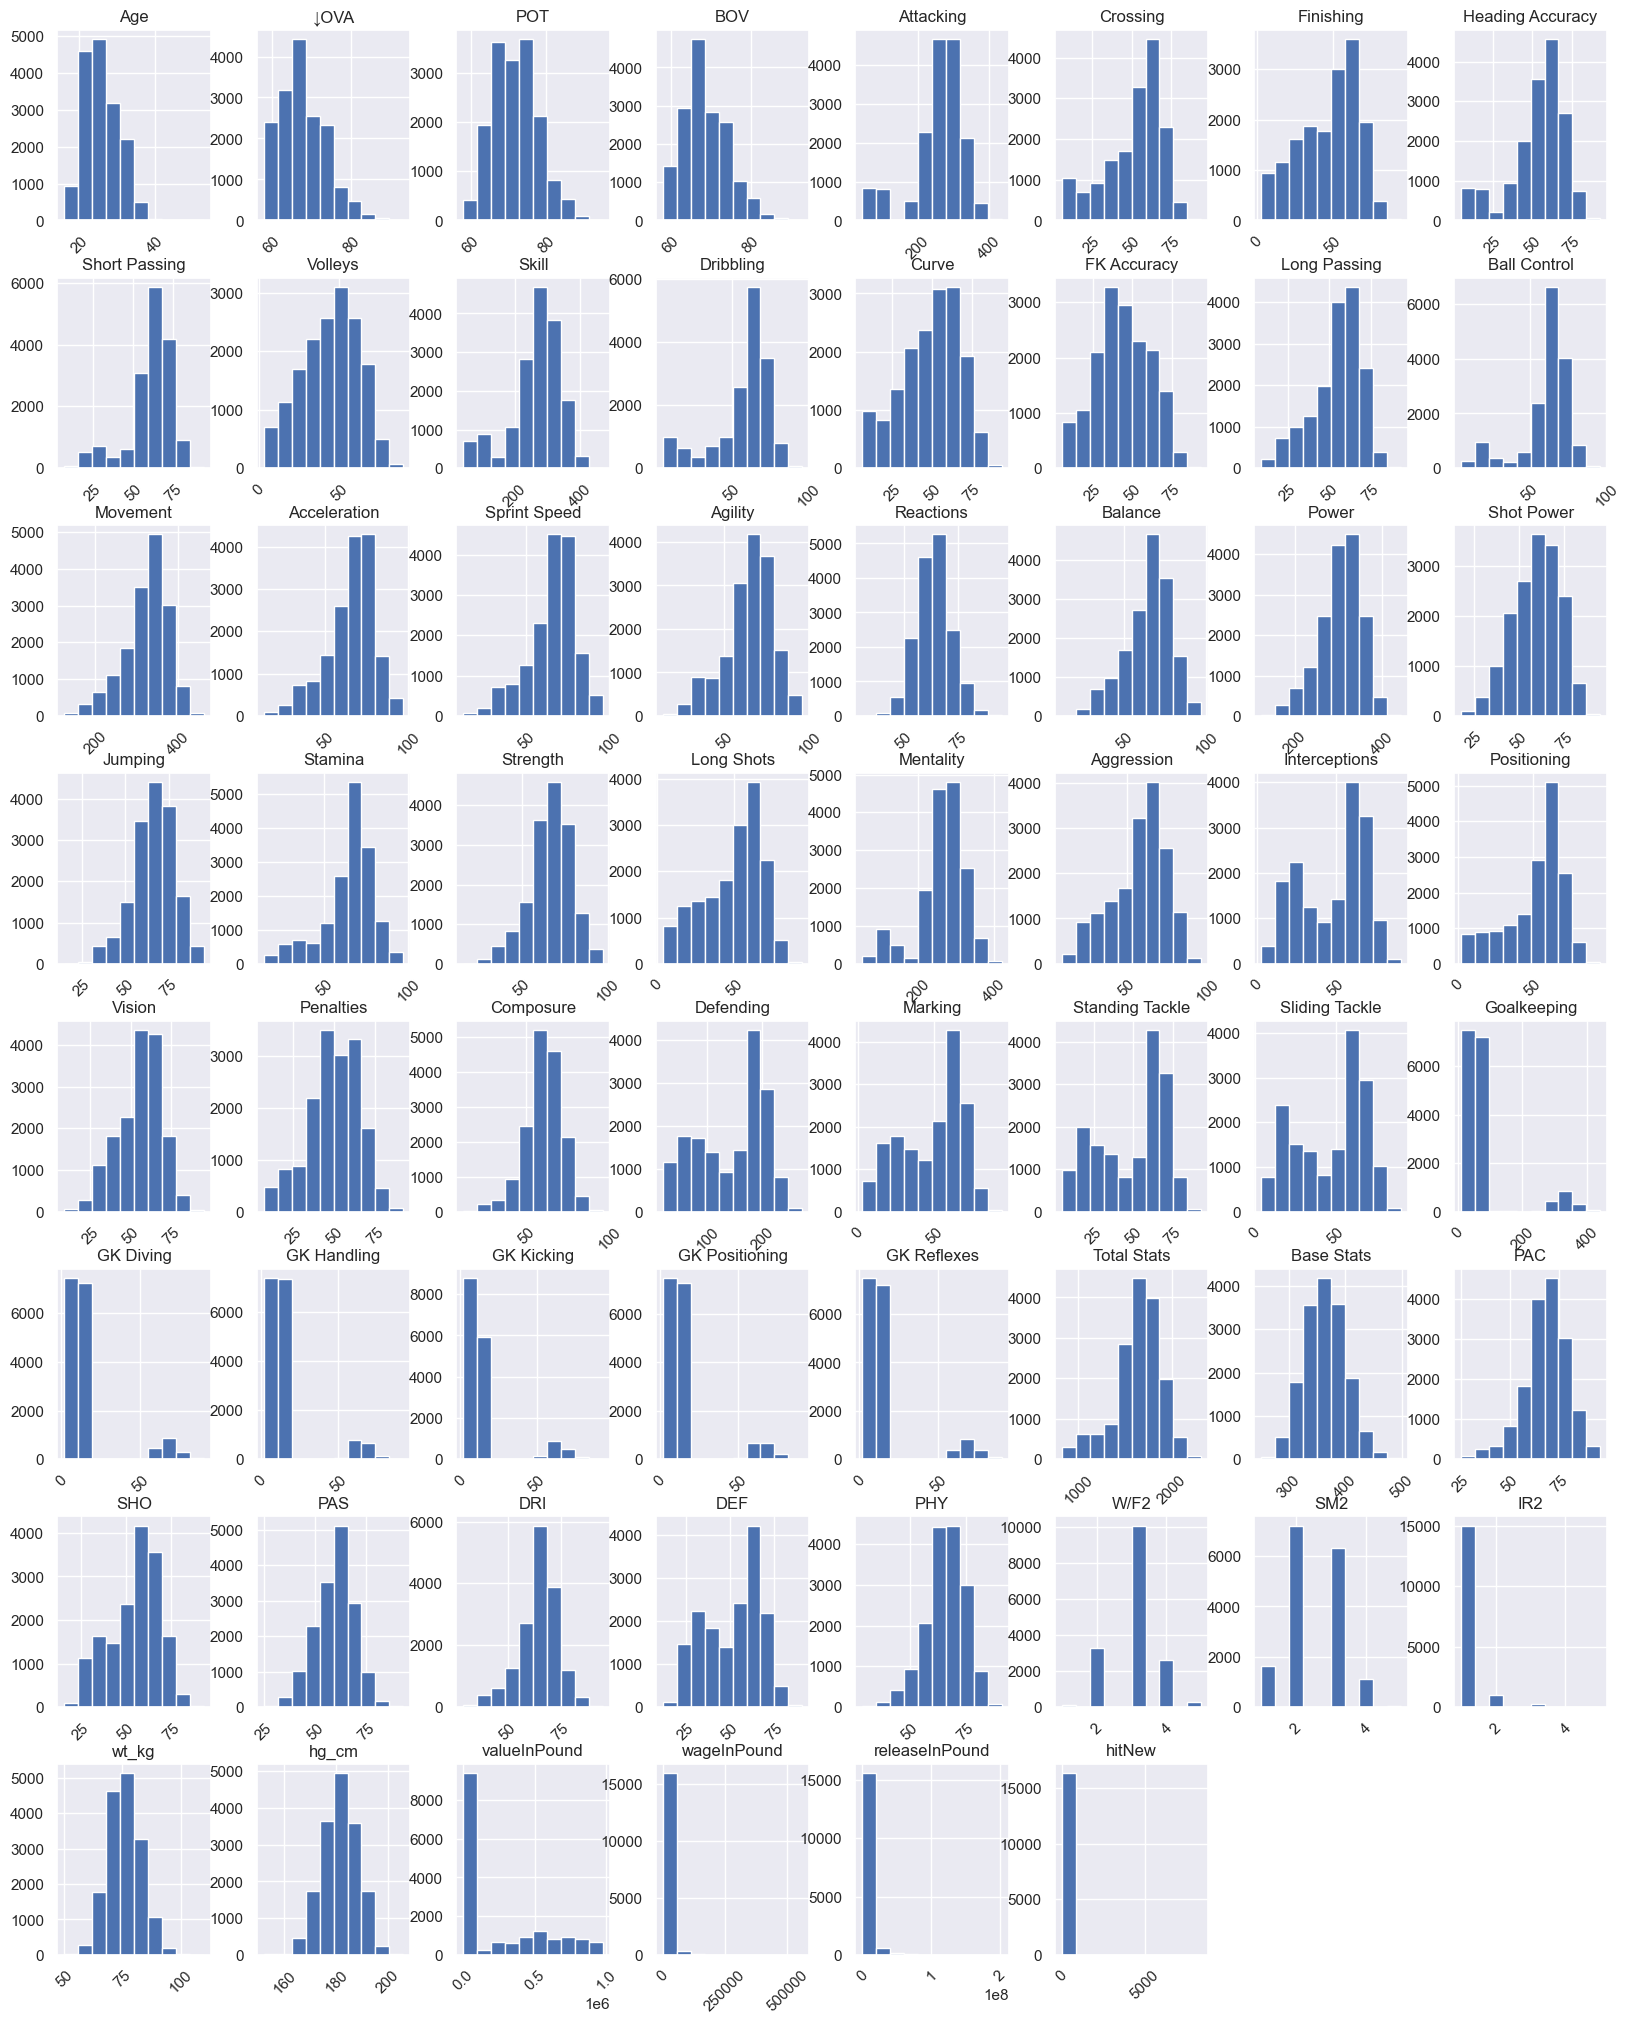

In [171]:
df_model.hist(figsize=(20,25), xrot=45)
plt.show()

In [172]:
# Seperate numeriacl from categorical features
continuous_vars=df_model.select_dtypes(['float64','int']).columns
#print(continuous_vars)
categorical_vars=df_model.select_dtypes('object').columns
#print(categorical_vars)

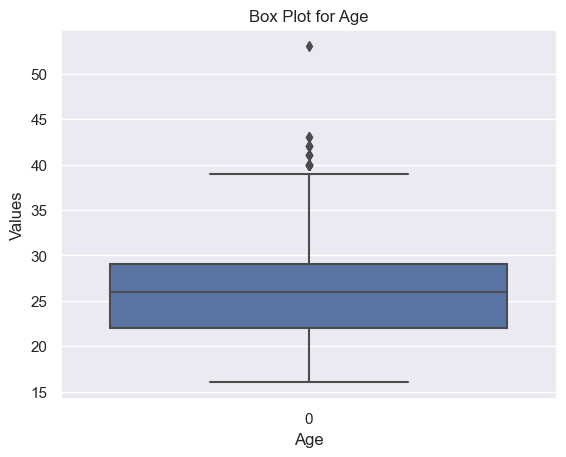

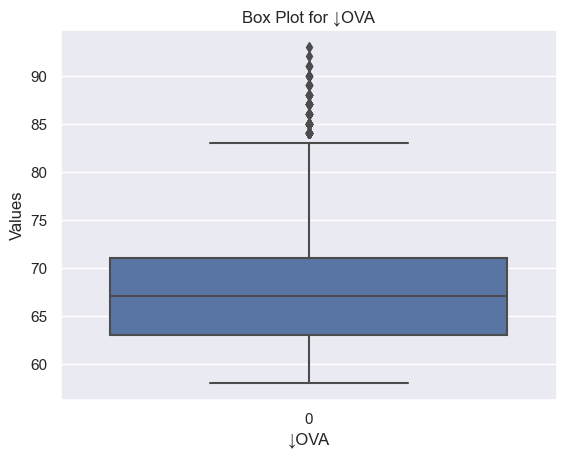

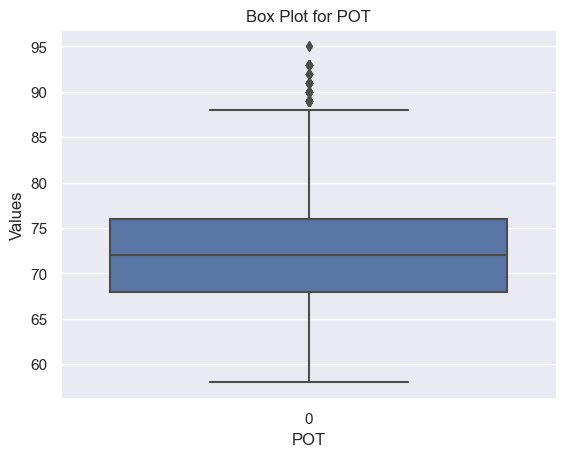

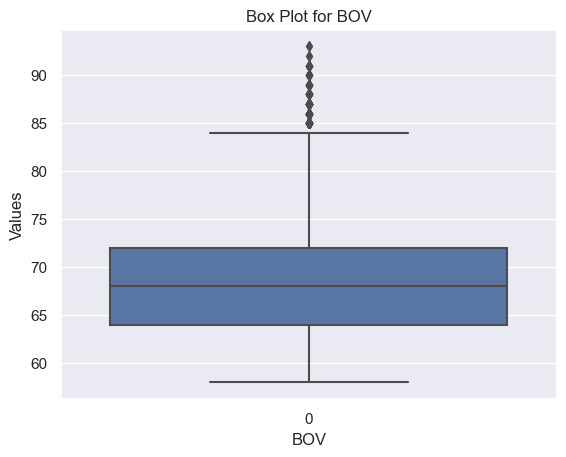

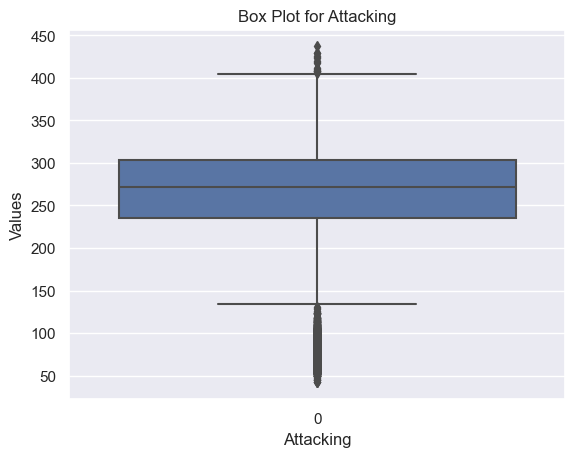

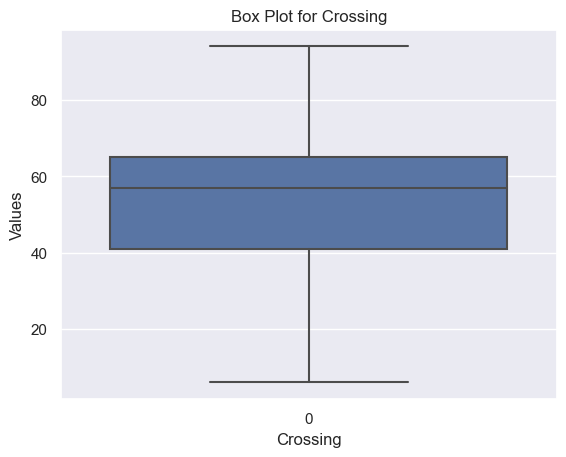

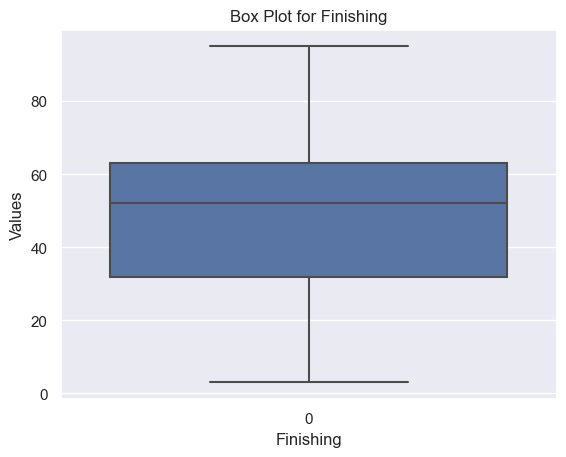

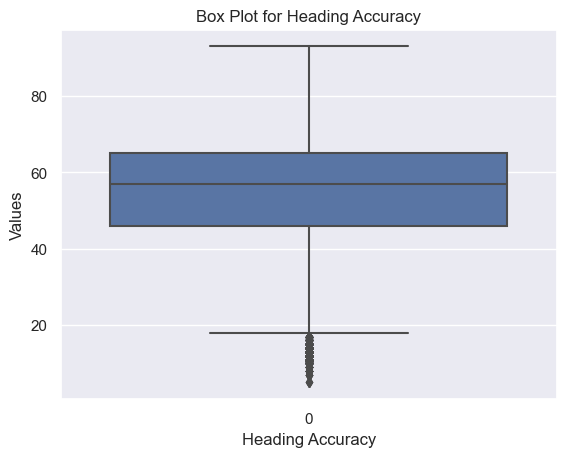

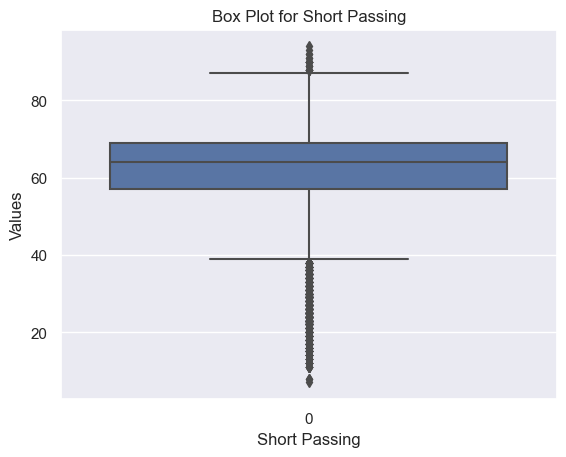

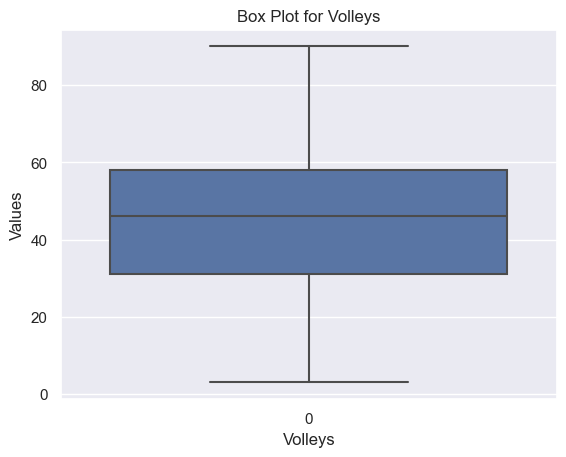

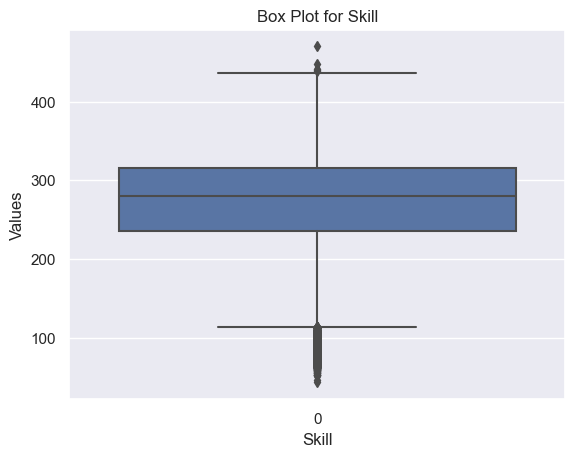

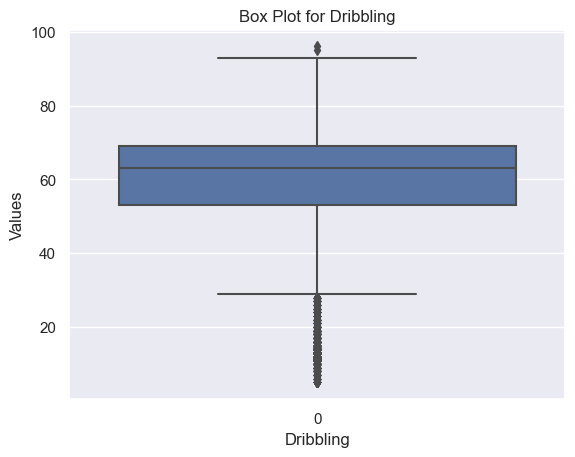

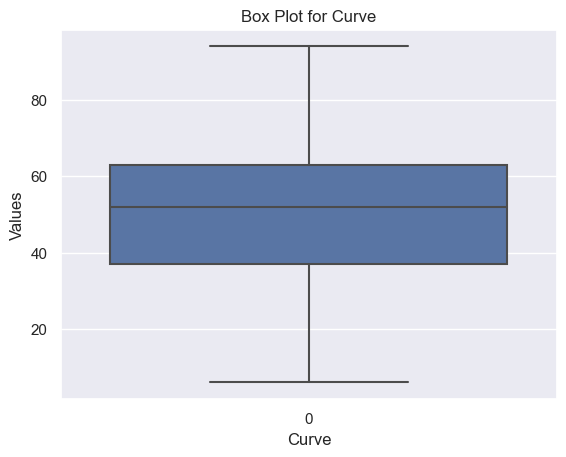

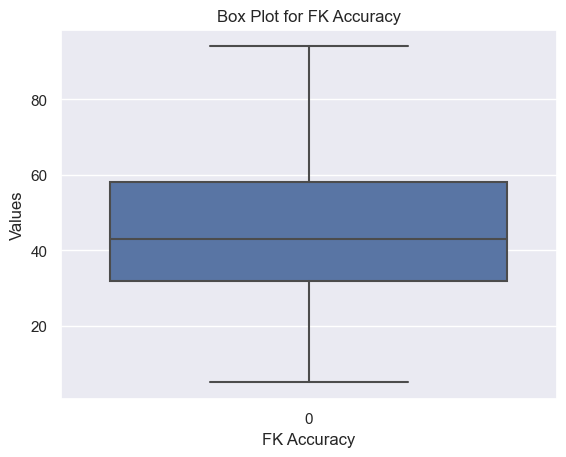

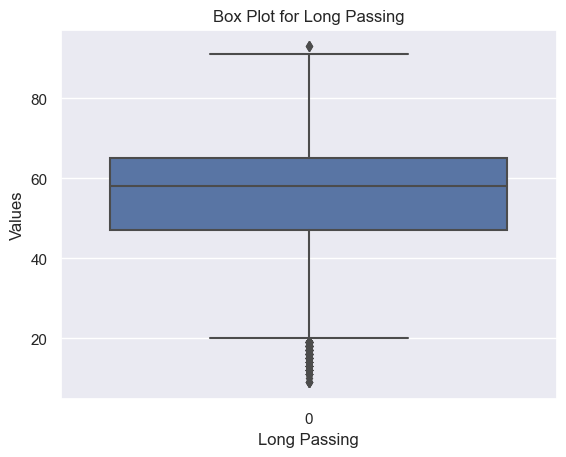

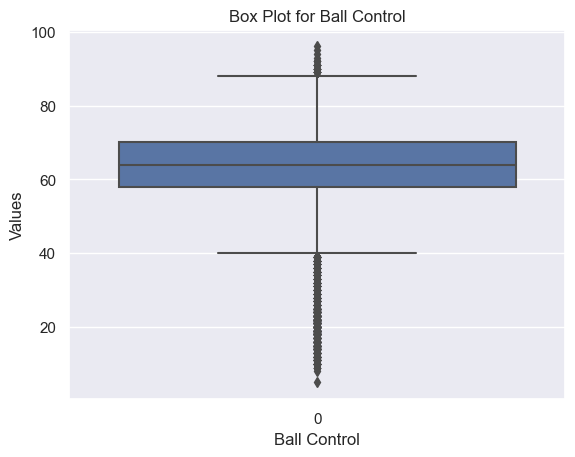

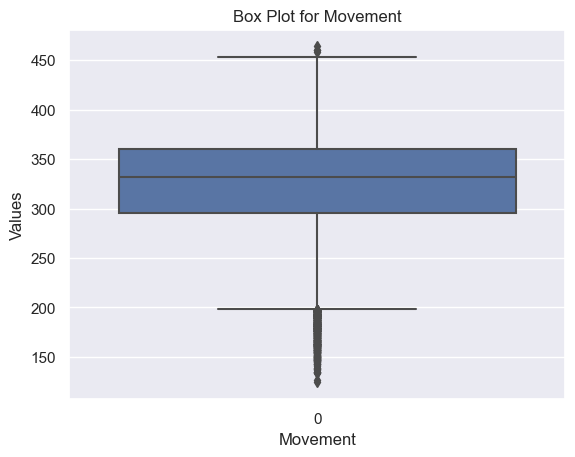

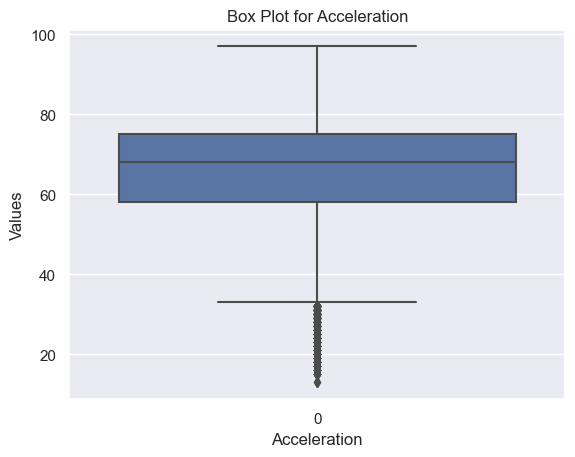

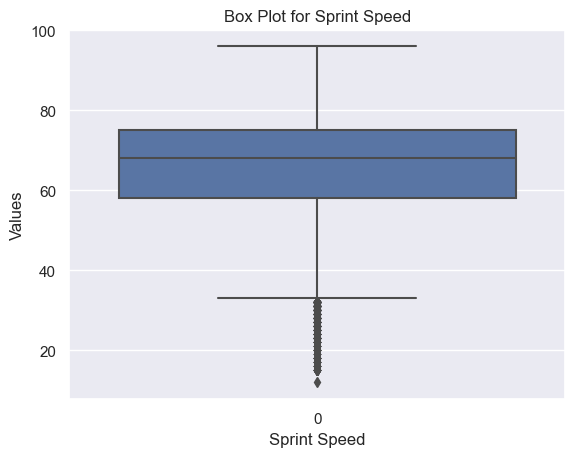

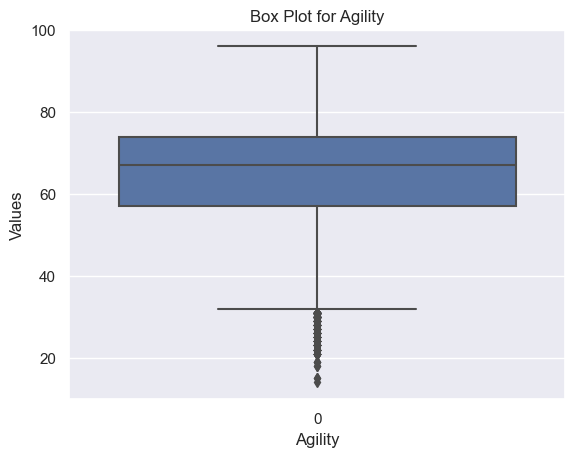

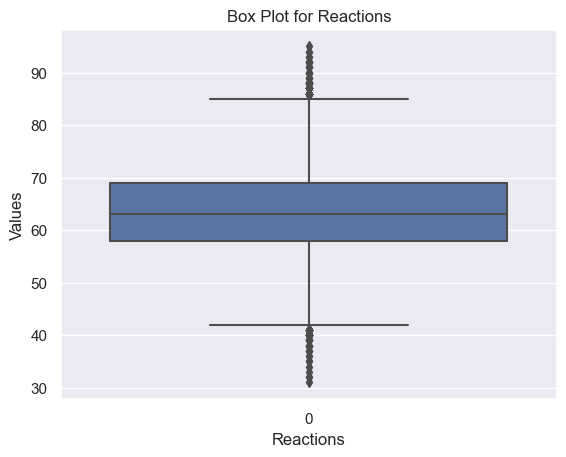

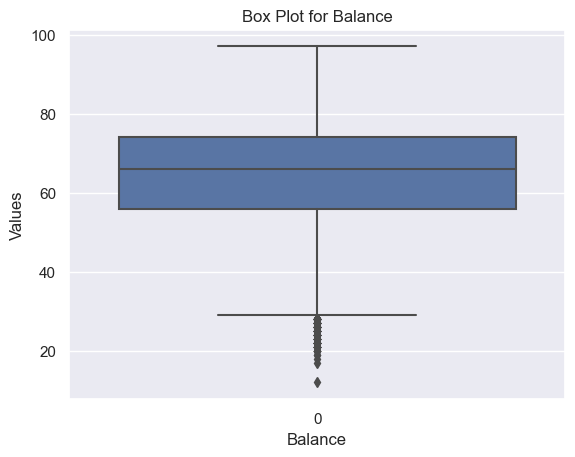

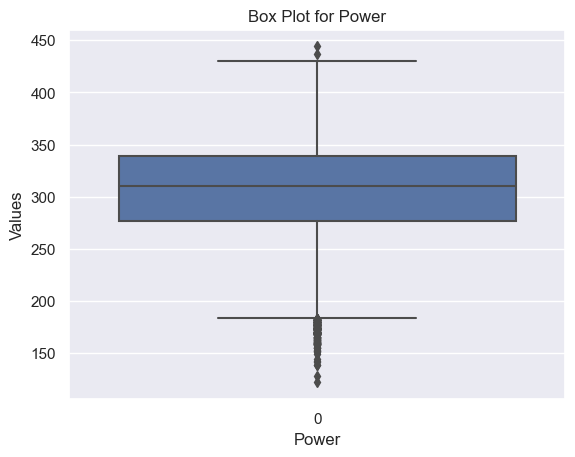

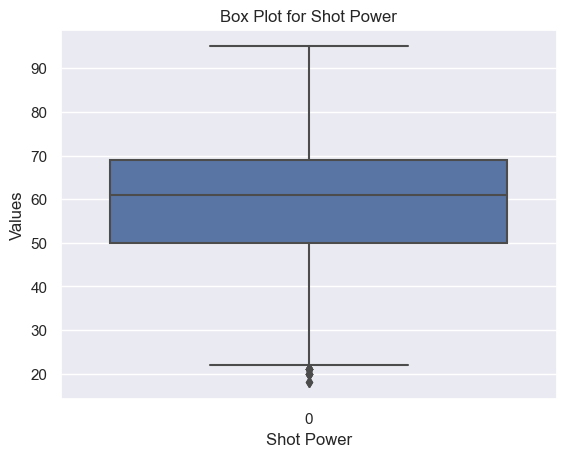

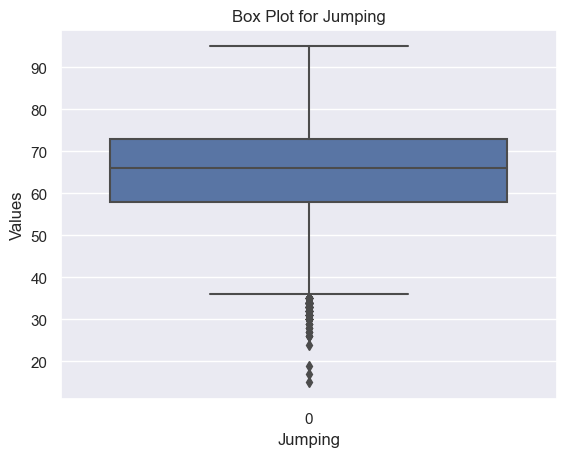

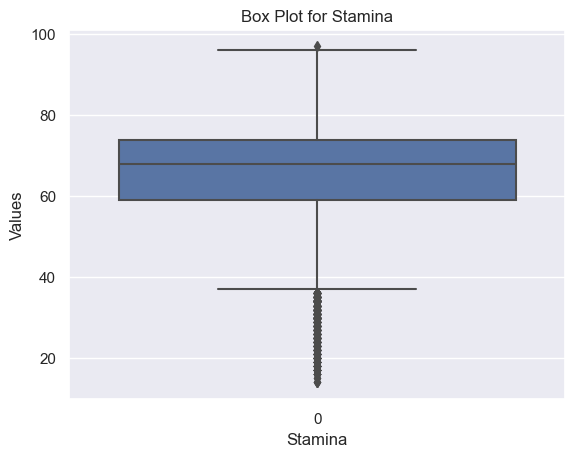

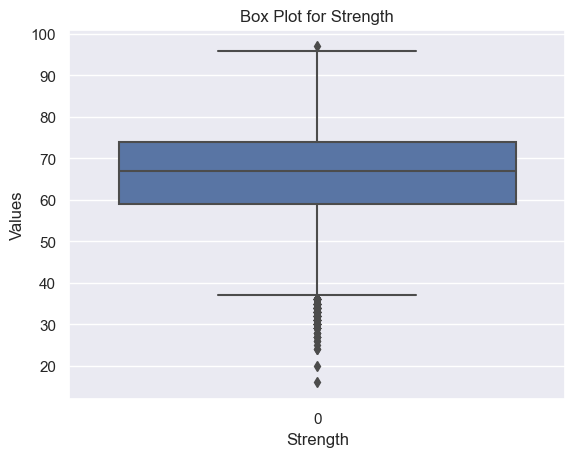

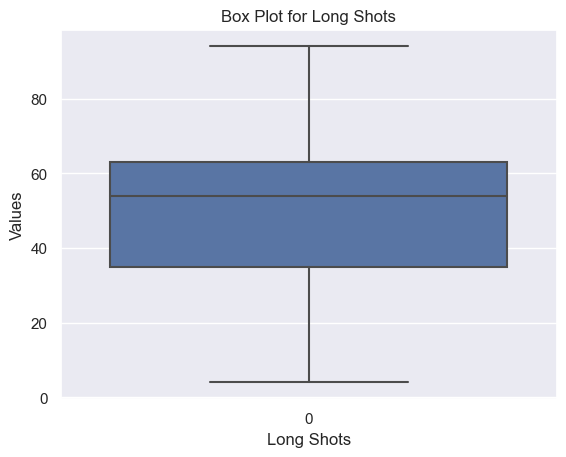

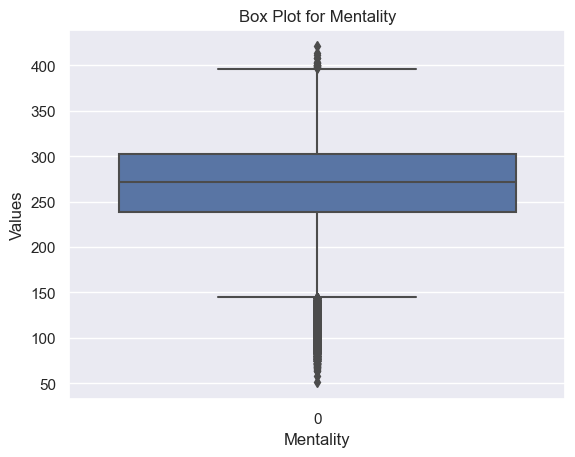

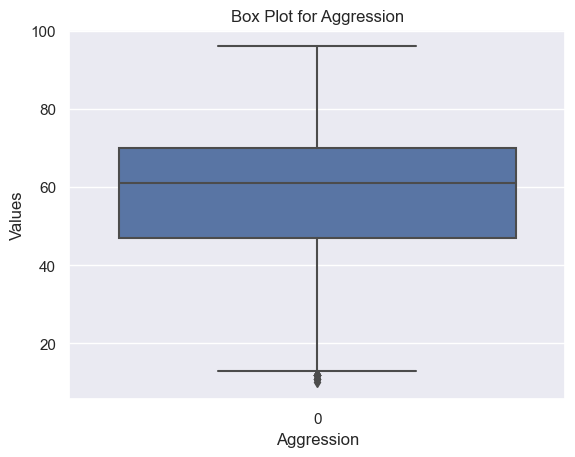

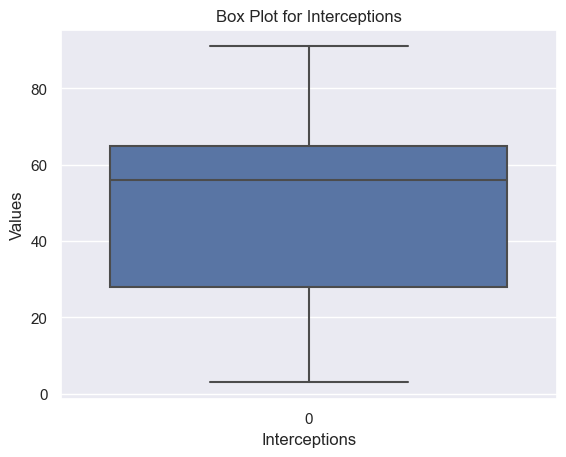

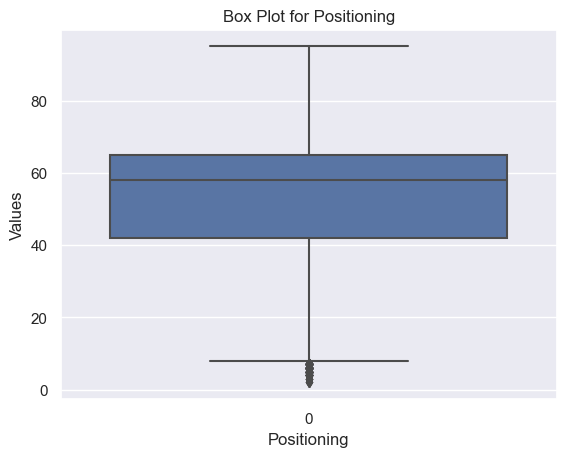

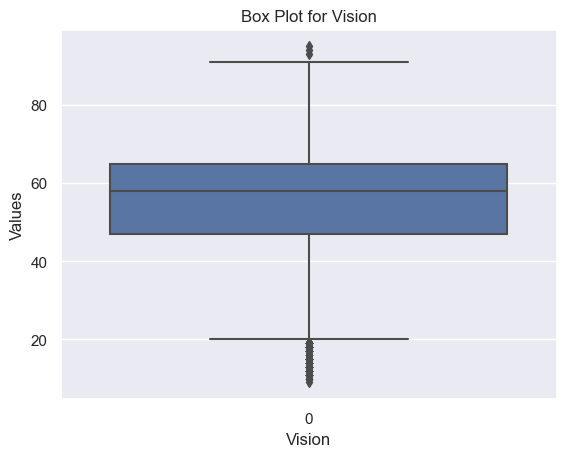

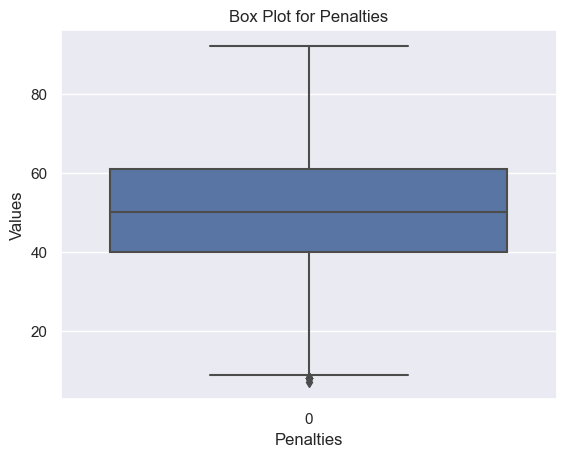

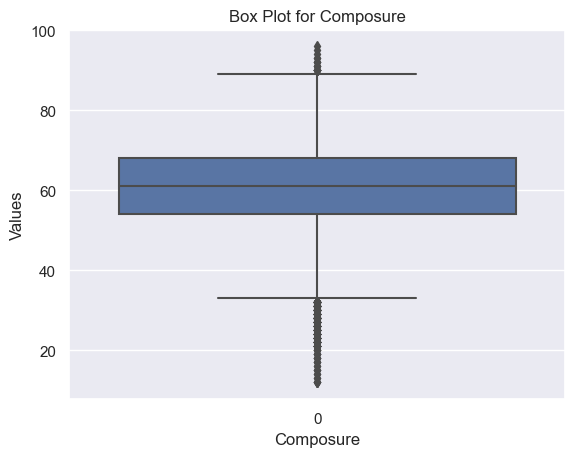

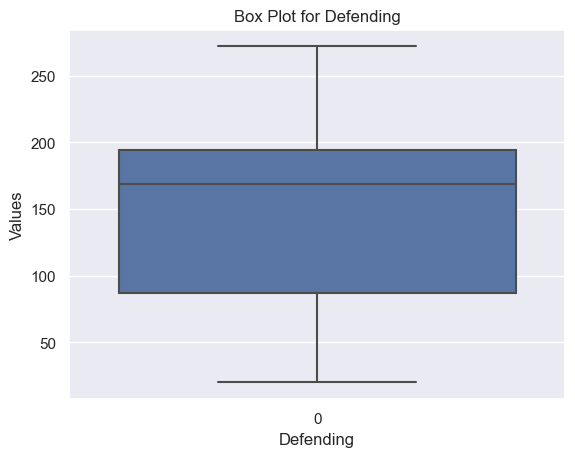

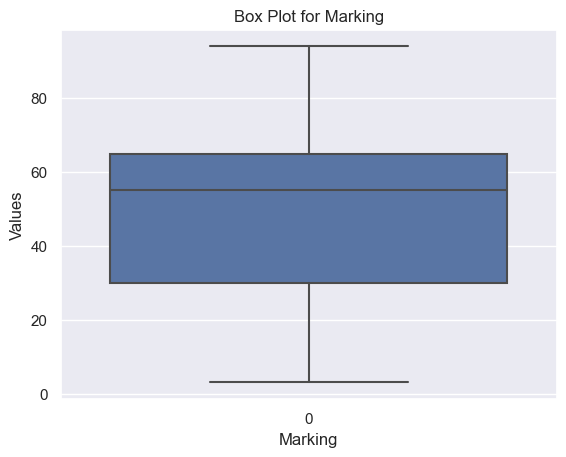

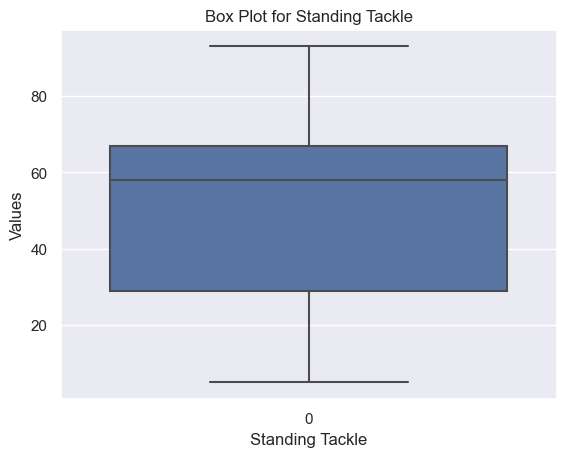

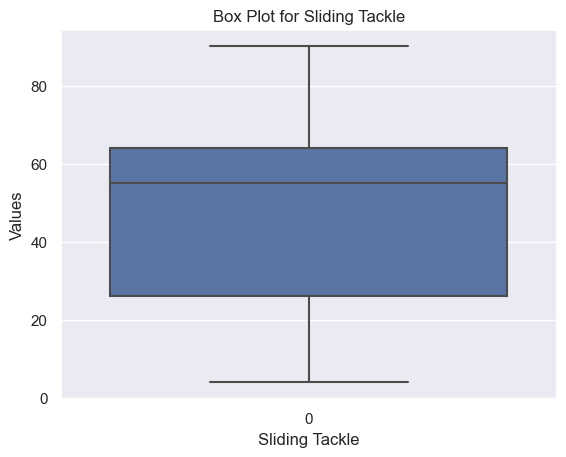

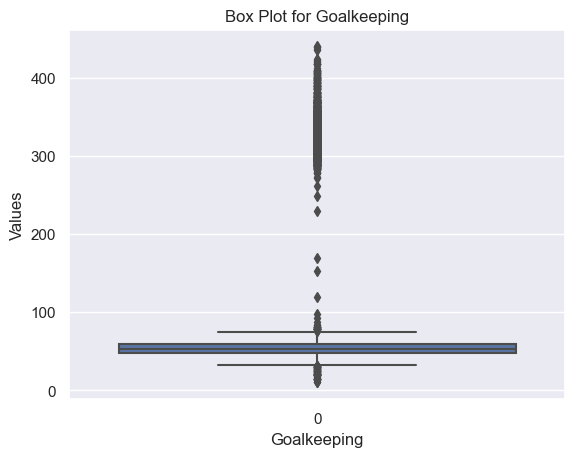

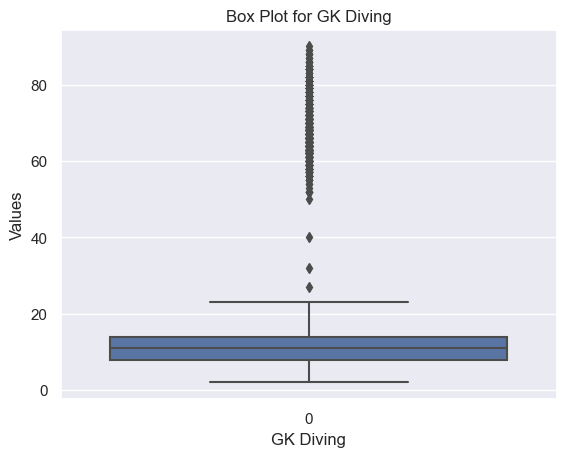

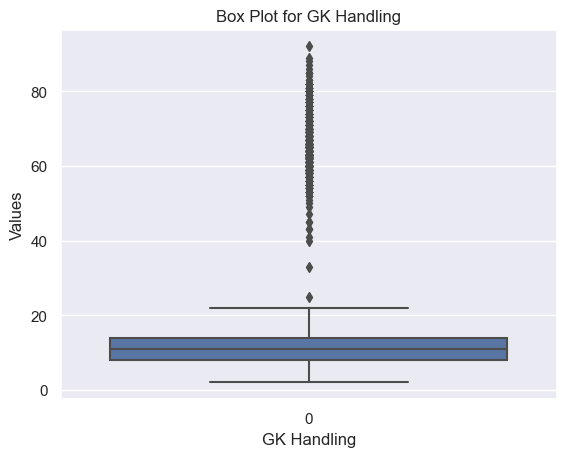

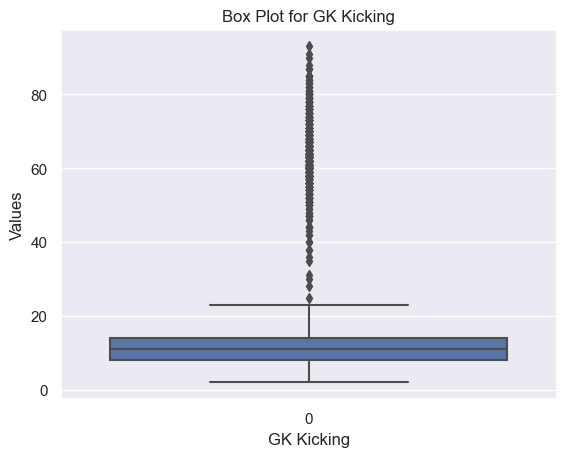

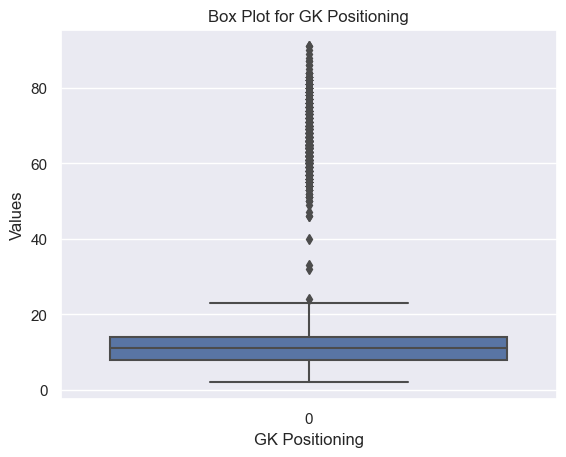

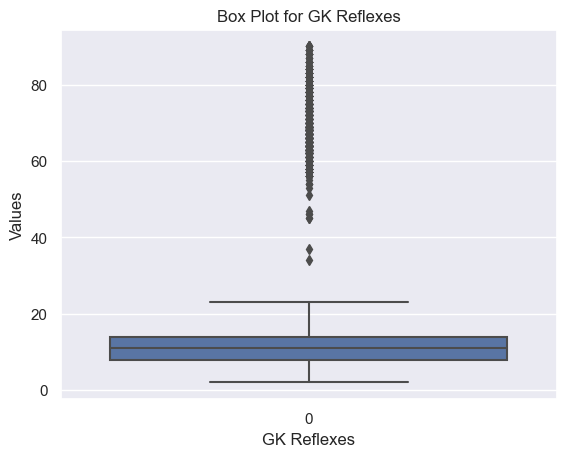

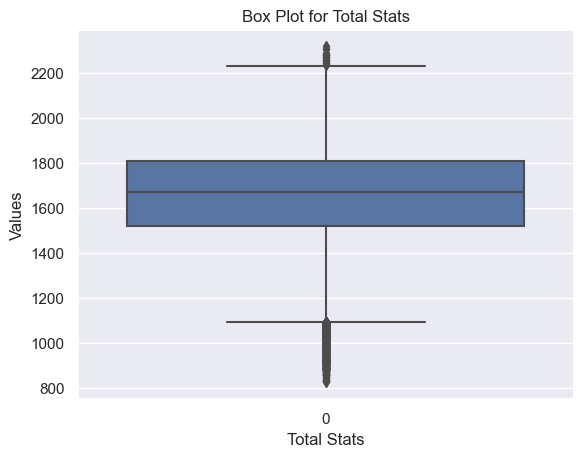

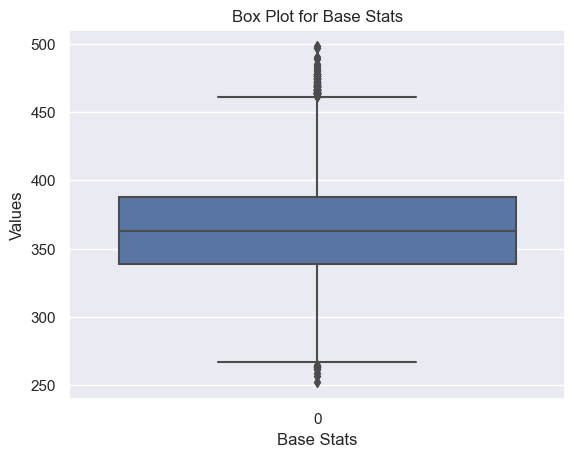

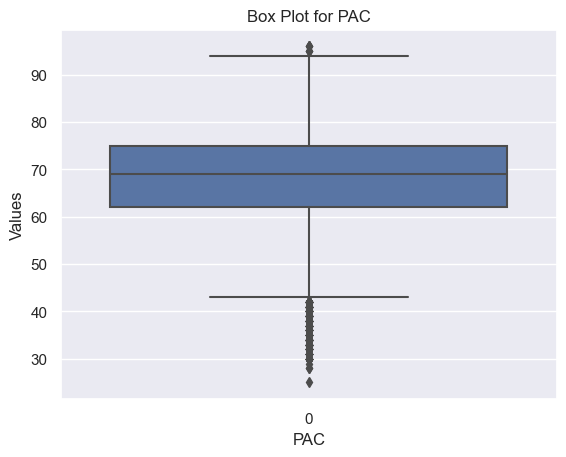

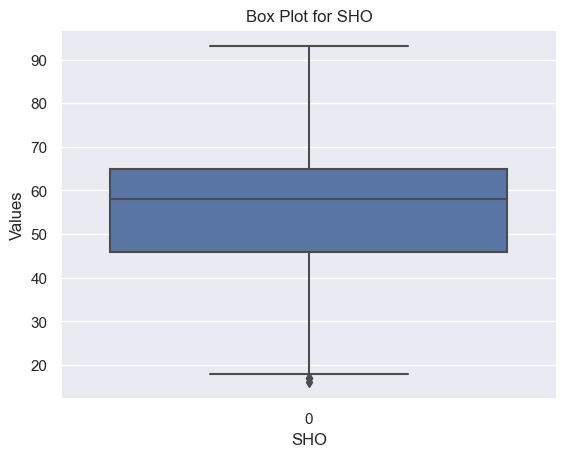

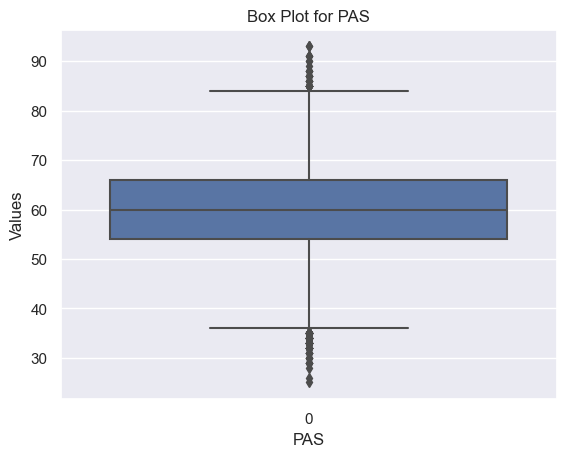

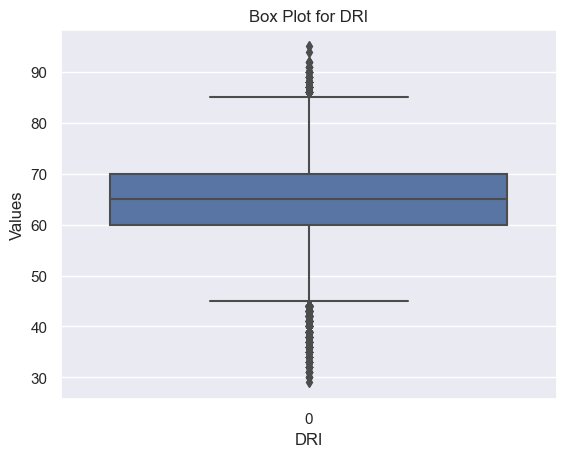

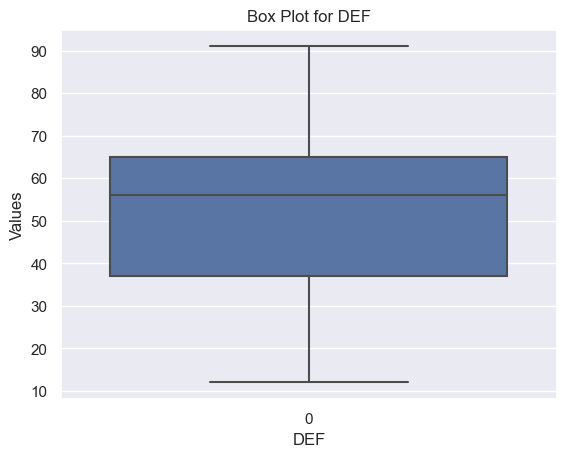

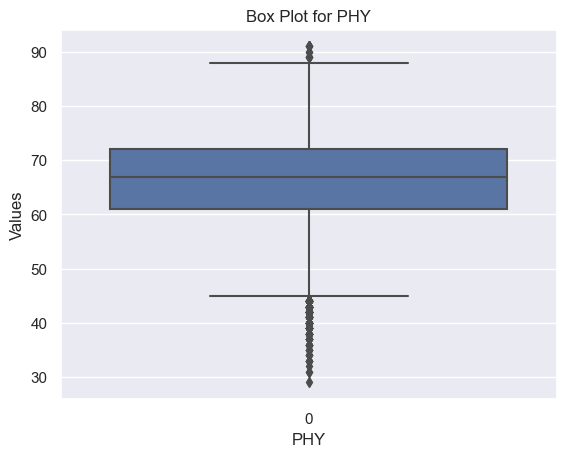

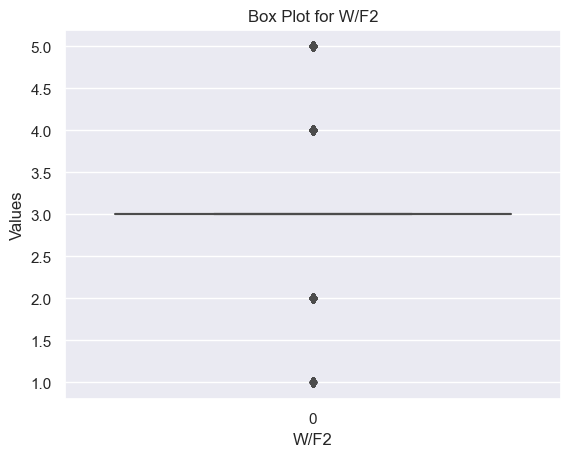

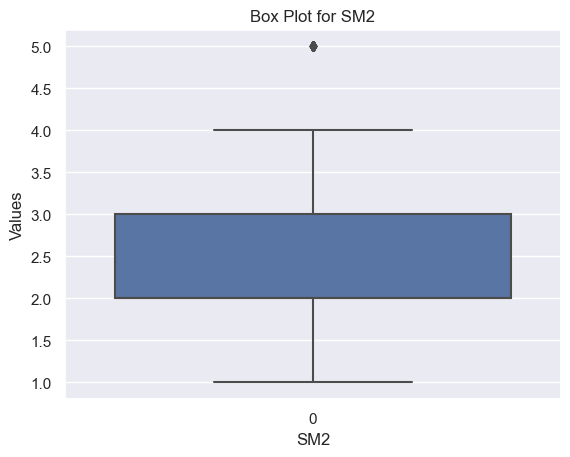

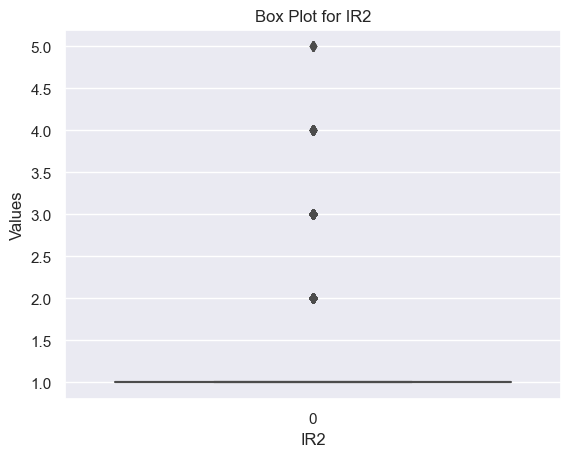

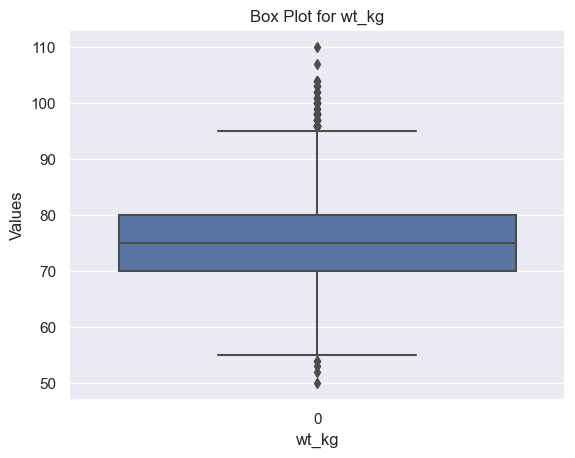

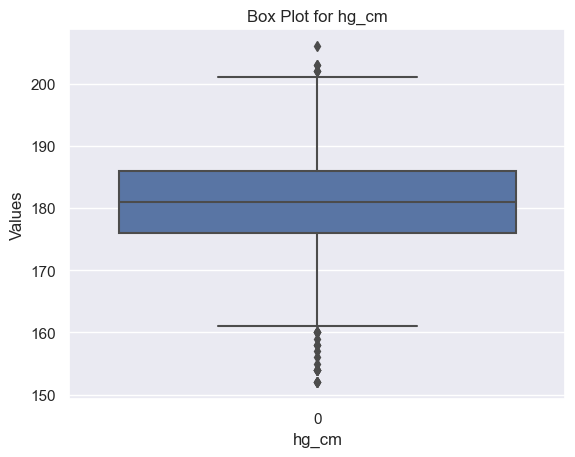

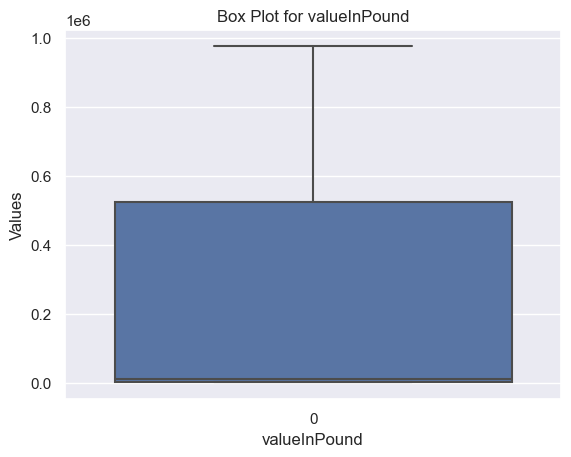

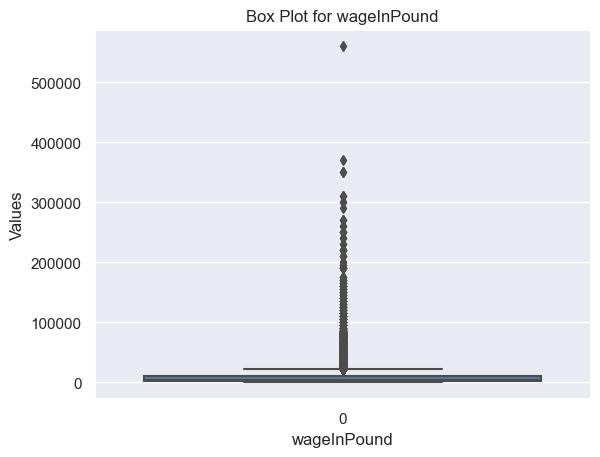

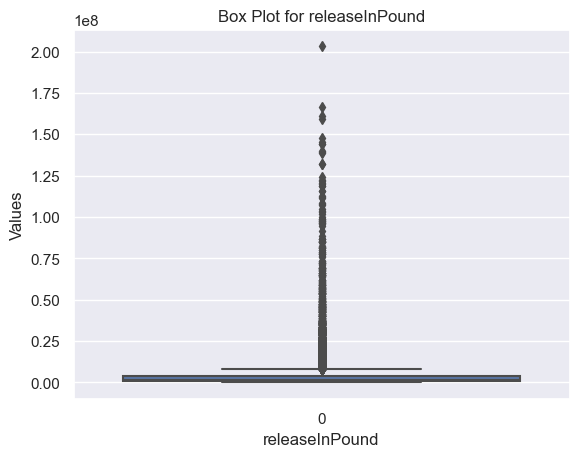

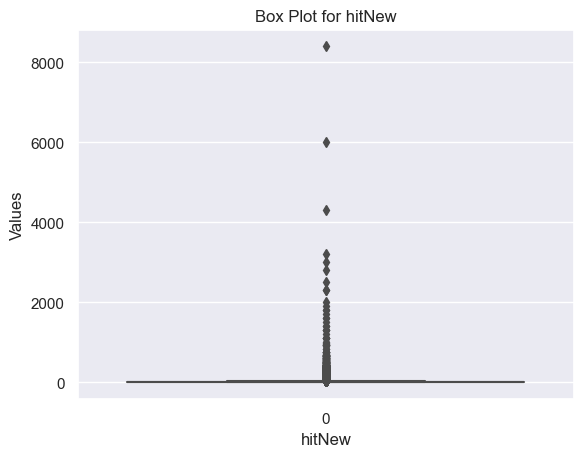

In [173]:
# Plot box plots for numeric columns
for col in continuous_vars:
    sns.boxplot(df_model[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

## Dealing with outlier

In [174]:
def outlier_lims(col):
 q3,q1 = np.percentile(col, [75,25])
 iqr = q3-q1
 upper_lim = q3 + 1.5*iqr
 lower_lim = q1 - 1.5*iqr
 return upper_lim, lower_lim

In [175]:
# Checking the percentage of outliers in the continuous_vars
for col in continuous_vars:
    print("--------------------------------------------------")
    print("Column:", col)
 
    UL,LL = outlier_lims(df_model[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
 
    total_outliers = len(df_model.loc[df_model[col]<LL,col]) + len(df_model.loc[df_model[col]>UL,col])
    percent = (total_outliers / len(df_model.index) )*100
 
    print("Percentage of Outliers=", percent)
    print("----------------------------------------------")


--------------------------------------------------
Column: Age
Upper Limit = 39.5
Lower Limit = 11.5
Percentage of Outliers= 0.152587890625
----------------------------------------------
--------------------------------------------------
Column: ↓OVA
Upper Limit = 83.0
Lower Limit = 51.0
Percentage of Outliers= 0.86669921875
----------------------------------------------
--------------------------------------------------
Column: POT
Upper Limit = 88.0
Lower Limit = 56.0
Percentage of Outliers= 0.37841796875
----------------------------------------------
--------------------------------------------------
Column: BOV
Upper Limit = 84.0
Lower Limit = 52.0
Percentage of Outliers= 0.78125
----------------------------------------------
--------------------------------------------------
Column: Attacking
Upper Limit = 405.0
Lower Limit = 133.0
Percentage of Outliers= 10.186767578125
----------------------------------------------
--------------------------------------------------
Column: Cross

In [176]:
# Outliers above the upper limit
out_above_uper=df_model.loc[df_model[col]>UL]
len(out_above_uper)

2202

In [177]:
# Outliers below the lower limit
out_below_lower=df_model.loc[df_model[col]<LL]
len(out_below_lower)

0

In [178]:
# Skewness check
#df_model.select_dtypes(include=['float64', 'int']).skew()


In [179]:
# Skewness check
for col in continuous_vars:
    print(col, '.....', df_model[col].skew())


Age ..... 0.3526161069064253
↓OVA ..... 0.6602610909313673
POT ..... 0.3214515073753579
BOV ..... 0.6629470844023632
Attacking ..... -1.244263535292444
Crossing ..... -0.7830401183621086
Finishing ..... -0.41588986973712316
Heading Accuracy ..... -0.9892195869325654
Short Passing ..... -1.4073123476408655
Volleys ..... -0.24233108649037166
Skill ..... -0.9581740168705953
Dribbling ..... -1.283826323101704
Curve ..... -0.38322199054525
FK Accuracy ..... 0.020767458204989413
Long Passing ..... -0.7430303533333582
Ball Control ..... -1.5754906960016521
Movement ..... -0.7594288325415405
Acceleration ..... -0.8087171642324836
Sprint Speed ..... -0.8241846076346319
Agility ..... -0.6756433093761258
Reactions ..... 0.1437600157822945
Balance ..... -0.615517519264129
Power ..... -0.5800058322950061
Shot Power ..... -0.3508000137525484
Jumping ..... -0.46511997404826433
Stamina ..... -1.028524929359313
Strength ..... -0.4987752361273195
Long Shots ..... -0.5614464812100324
Mentality ..... -1.1

In [180]:
#using log transformation to reduce skewness of the continuous_vars
for col in continuous_vars:
    df_model[col] = np.log1p(df_model[col])


In [181]:
# Cross checking the skewness
for col in continuous_vars:
    print(col, '.....', df_model[col].skew())

Age ..... 0.0014303783672782158
↓OVA ..... 0.4572748074290841
POT ..... 0.11494013574551676
BOV ..... 0.4630227782172929
Attacking ..... -2.145254203445911
Crossing ..... -1.6363614512342526
Finishing ..... -1.3688916233085489
Heading Accuracy ..... -1.9665959632958547
Short Passing ..... -2.3217993479219246
Volleys ..... -1.3768962903481698
Skill ..... -1.866328350950884
Dribbling ..... -2.1560458573575323
Curve ..... -1.320970655003163
FK Accuracy ..... -0.9748803637338375
Long Passing ..... -1.5749102754990052
Ball Control ..... -2.3981785524850787
Movement ..... -1.3379497019753313
Acceleration ..... -1.6857888495427982
Sprint Speed ..... -1.694798353988585
Agility ..... -1.3667467418906507
Reactions ..... -0.2905336922119778
Balance ..... -1.3471577213866424
Power ..... -1.072423700394958
Shot Power ..... -0.9664404527136161
Jumping ..... -1.1580913145851492
Stamina ..... -1.8551744461935034
Strength ..... -1.1812452027744846
Long Shots ..... -1.499044468528746
Mentality ..... -1.

In [182]:
# Cross checking the percentage of outliers in the continuous_vars after correcting the skewness 
for col in continuous_vars:
    print("--------------------------------------------------")
    print("Column:", col)
 
    UL,LL = outlier_lims(df_model[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
 
    total_outliers = len(df_model.loc[df_model[col]<LL,col]) + len(df_model.loc[df_model[col]>UL,col])
    percent = (total_outliers / len(df_model.index) )*100
 
    print("Percentage of Outliers=", percent)
    print("----------------------------------------------")


--------------------------------------------------
Column: Age
Upper Limit = 3.7997521302616644
Lower Limit = 2.736939467329641
Percentage of Outliers= 0.006103515625
----------------------------------------------
--------------------------------------------------
Column: ↓OVA
Upper Limit = 4.453340672500631
Lower Limit = 3.9822085298750958
Percentage of Outliers= 0.604248046875
----------------------------------------------
--------------------------------------------------
Column: POT
Upper Limit = 4.508353797738321
Lower Limit = 4.0695581287126235
Percentage of Outliers= 0.225830078125
----------------------------------------------
--------------------------------------------------
Column: BOV
Upper Limit = 4.464567698027523
Lower Limit = 4.000279013016506
Percentage of Outliers= 0.518798828125
----------------------------------------------
--------------------------------------------------
Column: Attacking
Upper Limit = 6.096821545977139
Lower Limit = 5.084037960454694
Percentage 

In [183]:
'''
# Computing and removing outliers

numeric_cols = df_model.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    # IQR
    # Calculate the upper and lower limits
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Create a mask of rows with outliers
    outlier_mask = (df_model[col] < lower) | (df_model[col] > upper)

    # Remove outliers using the mask
    df_model = df_model.loc[~outlier_mask]

# Reassign the DataFrame back to df_model
df_model.reset_index(drop=True, inplace=True)
'''

"\n# Computing and removing outliers\n\nnumeric_cols = df_model.select_dtypes(include=['int64', 'float64']).columns\n\nfor col in numeric_cols:\n    # IQR\n    # Calculate the upper and lower limits\n    Q1 = df_model[col].quantile(0.25)\n    Q3 = df_model[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower = Q1 - 1.5 * IQR\n    upper = Q3 + 1.5 * IQR\n\n    # Create a mask of rows with outliers\n    outlier_mask = (df_model[col] < lower) | (df_model[col] > upper)\n\n    # Remove outliers using the mask\n    df_model = df_model.loc[~outlier_mask]\n\n# Reassign the DataFrame back to df_model\ndf_model.reset_index(drop=True, inplace=True)\n"

In [184]:
df_model

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,W/F2,SM2,IR2,wt_kg,hg_cm,valueInPound,wageInPound,releaseInPound,hitNew
0,3.526361,4.543295,4.543295,Left,4.543295,RW,6.063785,4.454347,4.564348,4.262680,4.521789,4.488636,6.154858,4.574711,4.543295,4.553877,4.521789,4.574711,6.113682,4.521789,4.394449,4.521789,4.553877,4.564348,5.966147,4.465908,4.234107,4.290459,4.248495,4.553877,5.852202,3.806662,3.713572,4.543295,4.564348,4.330733,4.574711,4.521789,3.496508,3.583519,3.218876,4.007333,1.945910,2.484907,2.772589,2.708050,2.197225,7.710653,6.146329,Medium,Low,4.454347,4.532599,4.521789,4.564348,3.663562,4.189655,1.609438,1.609438,1.791759,4.290459,5.141664,11.547337,13.235694,18.745659,6.648985
1,3.583519,4.532599,4.532599,Right,4.532599,ST,6.082219,4.442651,4.564348,4.510860,4.418841,4.465908,6.028279,4.488636,4.406719,4.343805,4.356709,4.532599,6.068426,4.477337,4.521789,4.477337,4.564348,4.276666,6.098074,4.553877,4.564348,4.442651,4.369448,4.543295,5.869297,4.158883,3.401197,4.564348,4.418841,4.442651,4.564348,4.442651,3.367296,3.496508,3.218876,4.077537,2.079442,2.484907,2.772589,2.708050,2.484907,7.706163,6.142037,High,Low,4.499810,4.543295,4.406719,4.499810,3.583519,4.356709,1.609438,1.791759,1.791759,4.430817,5.236442,11.050906,12.301387,18.144927,6.333280
2,3.332205,4.521789,4.543295,Right,4.521789,GK,4.564348,2.639057,2.484907,2.772589,3.784190,2.639057,4.700480,2.564949,2.639057,2.708050,3.713572,3.433987,5.730100,3.784190,4.110874,4.219508,4.488636,3.912023,5.594711,4.094345,4.369448,3.737670,4.369448,2.564949,4.948760,3.555348,2.995732,2.484907,4.189655,2.484907,4.234107,4.060443,3.332205,2.564949,2.944439,6.082219,4.477337,4.532599,4.369448,4.510860,4.510860,7.254178,6.194405,Medium,Medium,4.477337,4.532599,4.369448,4.510860,3.970292,4.510860,1.386294,0.693147,1.386294,4.477337,5.241747,11.695255,11.736077,18.886927,5.017280
3,3.401197,4.521789,4.521789,Right,4.521789,CAM,6.011267,4.553877,4.418841,4.025352,4.553877,4.418841,6.091310,4.488636,4.454347,4.430817,4.543295,4.532599,5.988961,4.356709,4.343805,4.369448,4.521789,4.343805,6.013715,4.521789,4.158883,4.499810,4.317488,4.521789,6.013715,4.343805,4.204693,4.488636,4.553877,4.442651,4.521789,5.231109,4.234107,4.189655,3.988984,4.043051,2.772589,2.639057,1.791759,2.397895,2.639057,7.742836,6.186209,High,High,4.343805,4.465908,4.543295,4.488636,4.174387,4.369448,1.791759,1.609438,1.609438,4.262680,5.204007,11.767575,12.821261,18.896915,5.337538
4,3.367296,4.521789,4.521789,Right,4.521789,LW,6.013715,4.454347,4.477337,4.143135,4.477337,4.477337,6.107023,4.564348,4.488636,4.499810,4.406719,4.564348,6.118097,4.553877,4.499810,4.574711,4.521789,4.430817,5.880533,4.394449,4.143135,4.406719,3.931826,4.442651,5.877736,3.951244,3.610918,4.477337,4.510860,4.532599,4.543295,4.553877,3.583519,3.433987,3.401197,4.094345,2.302585,2.302585,2.772589,2.772589,2.484907,7.685244,6.113682,High,Medium,4.521789,4.454347,4.465908,4.553877,3.610918,4.094345,1.791759,1.791759,1.791759,4.234107,5.170484,11.790565,12.506181,18.930506,6.390241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16658,2.995732,4.077537,4.304065,Right,4.077537,RB,5.342334,4.025352,3.465736,3.871201,3.871201,3.367296,5.170484,3.970292,3.367296,3.401197,3.178054,3.784190,5.805135,4.343805,4.290459,4.143135,3.891820,4

<AxesSubplot:>

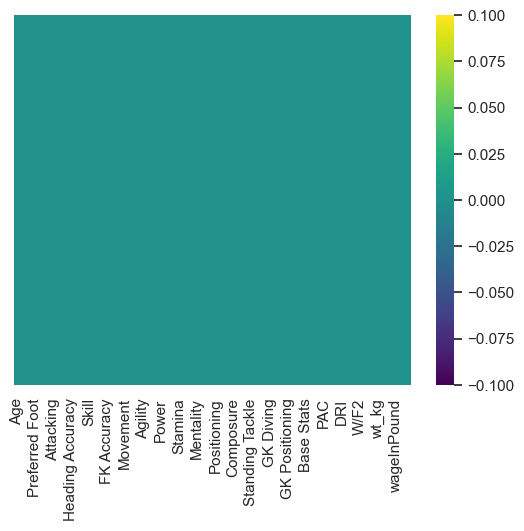

In [185]:
sns.heatmap(df_model.isnull(), yticklabels=False, cmap="viridis")

In [186]:
round((df_model.isnull().sum() * 100/ len(df_model)),2).sort_values(ascending=False)

Age           0.0
A/W           0.0
Penalties     0.0
Composure     0.0
Defending     0.0
             ... 
Stamina       0.0
Strength      0.0
Long Shots    0.0
Mentality     0.0
hitNew        0.0
Length: 66, dtype: float64

## Building Model

In [187]:
categorical_vars

Index(['Preferred Foot', 'Best Position', 'A/W', 'D/W'], dtype='object')

In [188]:
# Encoding the categorical columns

le = LabelEncoder()

for col in categorical_vars:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

In [189]:
#Separating the features from the Target

x=df_model.drop('hitNew',axis =1)
y=df_model['hitNew']

In [190]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=105)

Model without scaling 

In [191]:
# Neural Network 

# Create the model
model = Sequential()
model.add(Dense(128, input_dim=65, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.0001), metrics=["mse", "mae", "mape", "cosine_similarity"])

# Early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

# Train the model
model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_data=(xtest, ytest), callbacks=[early_stopping, reduce_lr], shuffle=True, verbose=2)

Epoch 1/100
359/359 - 10s - loss: 2.6770 - mse: 2.6770 - mae: 1.1133 - mape: 70.3073 - cosine_similarity: 0.8839 - val_loss: 1.1493 - val_mse: 1.1493 - val_mae: 0.8258 - val_mape: 53.0122 - val_cosine_similarity: 1.0000 - lr: 1.0000e-04 - 10s/epoch - 28ms/step
Epoch 2/100
359/359 - 2s - loss: 1.0767 - mse: 1.0767 - mae: 0.7968 - mape: 50.7076 - cosine_similarity: 1.0000 - val_loss: 0.9754 - val_mse: 0.9754 - val_mae: 0.7619 - val_mape: 49.7407 - val_cosine_similarity: 1.0000 - lr: 1.0000e-04 - 2s/epoch - 5ms/step
Epoch 3/100
359/359 - 2s - loss: 0.9366 - mse: 0.9366 - mae: 0.7406 - mape: 46.8138 - cosine_similarity: 1.0000 - val_loss: 0.8733 - val_mse: 0.8733 - val_mae: 0.7154 - val_mape: 45.9009 - val_cosine_similarity: 1.0000 - lr: 1.0000e-04 - 2s/epoch - 4ms/step
Epoch 4/100
359/359 - 2s - loss: 0.8591 - mse: 0.8591 - mae: 0.7070 - mape: 44.6339 - cosine_similarity: 1.0000 - val_loss: 0.8350 - val_mse: 0.8350 - val_mae: 0.7036 - val_mape: 46.3214 - val_cosine_similarity: 1.0000 - lr

In [192]:
# Create the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(xtrain, ytrain)

# Predict on test data
y_pred = model.predict(xtest)

# Calculate mean squared error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2)
r_squared = r2_score(ytest, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Explained Variance Score
explained_variance = explained_variance_score(ytest, y_pred)
print("Explained Variance Score:", explained_variance)


Mean Squared Error: 0.36017693520355565
Root Mean Squared Error (RMSE): 0.6001474278904773
Mean Absolute Error (MAE): 0.46275438206620473
R-squared (R^2): 0.7633589377404606
Mean Absolute Percentage Error (MAPE): 0.3007465746532449
Explained Variance Score: 0.763360776230118


In [193]:
k = 30
# Using feature importance scores from RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x, y)
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
selected_features = feature_importances.nlargest(k).index
x_tree_importance = x[selected_features]
#print(x_tree_importance)
#print(len(x_tree_importance.columns))

xtrain,xtest,ytrain,ytest=train_test_split(x_tree_importance,y,test_size=0.3,random_state=105)


# Train the model
model.fit(xtrain, ytrain)

# Predict on test data
y_pred = model.predict(xtest)

# Calculate mean squared error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2)
r_squared = r2_score(ytest, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Explained Variance Score
explained_variance = explained_variance_score(ytest, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error: 0.3647501186900488
Root Mean Squared Error (RMSE): 0.6039454600293381
Mean Absolute Error (MAE): 0.46481782172079367
R-squared (R^2): 0.7603542950430044
Mean Absolute Percentage Error (MAPE): 0.3028606974117966
Explained Variance Score: 0.7603936176395416


## Model with scaling 

In [194]:
# Different scaling techniques 

minmax = MinMaxScaler(feature_range=(0,1))
xtrain_minmax= minmax.fit_transform(xtrain)
xtest_minmax= minmax.transform(xtest)
 

Data_normalizer = Normalizer(norm='l1')
xtrain_l1= Data_normalizer.fit_transform(xtrain)
xtest_l1= Data_normalizer.transform(xtest)


Data_normalizer2 = Normalizer(norm='l2')
xtrain_l2= Data_normalizer2.fit_transform(xtrain)
xtest_l2= Data_normalizer2.transform(xtest)

data_scaler = StandardScaler()
xtrain_scaler= Data_normalizer.fit_transform(xtrain)
xtest_scaler= Data_normalizer.transform(xtest)


In [195]:
# GradientBoostingRegressor using L1 scaler
# Create the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(xtrain_l1, ytrain)

# Predict on test data
y_pred = model.predict(xtest_l1)

# Calculate mean squared error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2)
r_squared = r2_score(ytest, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Explained Variance Score
explained_variance = explained_variance_score(ytest, y_pred)
print("Explained Variance Score:", explained_variance)


Mean Squared Error: 0.43145801195662903
Root Mean Squared Error (RMSE): 0.656854635331615
Mean Absolute Error (MAE): 0.5007456584740062
R-squared (R^2): 0.7165263172332147
Mean Absolute Percentage Error (MAPE): 0.3233521220059365
Explained Variance Score: 0.7165778587604359


In [196]:
# GradientBoostingRegressor using minmax scaler
# Create the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(xtrain_minmax, ytrain)

# Predict on test data
y_pred = model.predict(xtest_minmax)

# Calculate mean squared error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2)
r_squared = r2_score(ytest, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Explained Variance Score
explained_variance = explained_variance_score(ytest, y_pred)
print("Explained Variance Score:", explained_variance)


Mean Squared Error: 0.36280046423193235
Root Mean Squared Error (RMSE): 0.6023291992191084
Mean Absolute Error (MAE): 0.4638241029664526
R-squared (R^2): 0.7616352440903025
Mean Absolute Percentage Error (MAPE): 0.30151188734827344
Explained Variance Score: 0.7616405076931638


In [197]:
# RandomForestRegressor with minmax
# Create the model
model = RandomForestRegressor(n_estimators=100)

# Train the model
model.fit(xtrain_minmax, ytrain)

# Predict on test data
y_pred = model.predict(xtest_minmax)

# Calculate mean squared error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2)
r_squared = r2_score(ytest, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Explained Variance Score
explained_variance = explained_variance_score(ytest, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error: 0.36101750811860417
Root Mean Squared Error (RMSE): 0.6008473251322703
Mean Absolute Error (MAE): 0.4625932434536379
R-squared (R^2): 0.7628066700961951
Mean Absolute Percentage Error (MAPE): 0.3018616521278269
Explained Variance Score: 0.7628381111024587


In [198]:
# LinearRegression with minmax
# Create the model
model = linear_model.LinearRegression()

# Train the model
model.fit(xtrain_minmax, ytrain)

# Predict on test data
y_pred = model.predict(xtest_minmax)

# Calculate mean squared error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2)
r_squared = r2_score(ytest, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Explained Variance Score
explained_variance = explained_variance_score(ytest, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error: 0.5439005316671699
Root Mean Squared Error (RMSE): 0.7374961231539932
Mean Absolute Error (MAE): 0.5732371300748962
R-squared (R^2): 0.6426500783441151
Mean Absolute Percentage Error (MAPE): 0.3800625898446587
Explained Variance Score: 0.642656583316951


In [199]:
#Univariate feature selection, Selecting top k features based on the F-test (ANOVA) between feature and target together with minmax scaler
k = 30
selector = SelectKBest(score_func=f_regression, k=k)
x_univariate = selector.fit_transform(x, y)

xtrain,xtest,ytrain,ytest=train_test_split(x_univariate,y,test_size=0.3,random_state=105)

# Create the model
model = RandomForestRegressor(n_estimators=100)

# Train the model
model.fit(xtrain_minmax, ytrain)

# Predict on test data
y_pred = model.predict(xtest_minmax)

# Calculate mean squared error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2)
r_squared = r2_score(ytest, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Explained Variance Score
explained_variance = explained_variance_score(ytest, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error: 0.36213147344059965
Root Mean Squared Error (RMSE): 0.6017736064672492
Mean Absolute Error (MAE): 0.46293089589574116
R-squared (R^2): 0.7620747799851075
Mean Absolute Percentage Error (MAPE): 0.3017977860440635
Explained Variance Score: 0.7621205082831302


In [200]:
k = 30
# Using feature importance scores from RandomForestRegressor with minmax
model = RandomForestRegressor(n_estimators=100)
model.fit(x, y)
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
selected_features = feature_importances.nlargest(k).index
x_tree_importance = x[selected_features]
#print(x_tree_importance)
#print(len(x_tree_importance.columns))

xtrain,xtest,ytrain,ytest=train_test_split(x_tree_importance,y,test_size=0.3,random_state=105)


# Train the model
model.fit(xtrain, ytrain)

# Predict on test data
y_pred = model.predict(xtest)

# Calculate mean squared error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2)
r_squared = r2_score(ytest, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Explained Variance Score
explained_variance = explained_variance_score(ytest, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error: 0.3611641980210984
Root Mean Squared Error (RMSE): 0.6009693819331384
Mean Absolute Error (MAE): 0.4616965389262054
R-squared (R^2): 0.7627102928689043
Mean Absolute Percentage Error (MAPE): 0.30126568740745524
Explained Variance Score: 0.7627459250193953


In [201]:
# Principal Component Analysis (PCA)
k=60
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=k)
x_pca = pca.fit_transform(x_scaled)


xtrain,xtest,ytrain,ytest=train_test_split(x_pca,y,test_size=0.3,random_state=105)


# Train the model
model.fit(xtrain_minmax, ytrain)

# Predict on test data
y_pred = model.predict(xtest_minmax)

# Calculate mean squared error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2)
r_squared = r2_score(ytest, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Explained Variance Score
explained_variance = explained_variance_score(ytest, y_pred)
print("Explained Variance Score:", explained_variance)


Mean Squared Error: 0.3608568035039294
Root Mean Squared Error (RMSE): 0.6007135785912696
Mean Absolute Error (MAE): 0.4625413791304189
R-squared (R^2): 0.7629122551767753
Mean Absolute Percentage Error (MAPE): 0.30157883016656006
Explained Variance Score: 0.7629523557291902


In [202]:
k = 20
# Using feature importance scores from RandomForestRegressor or other tree-based models like GradientBoostingRegressor, etc.
model = RandomForestRegressor(n_estimators=100)
model.fit(x, y)
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
selected_features = feature_importances.nlargest(k).index
x_tree_importance = x[selected_features]
#print(x_tree_importance)
input_dim = len(x_tree_importance.columns)

xtrain,xtest,ytrain,ytest=train_test_split(x_tree_importance,y,test_size=0.3,random_state=105)


from tensorflow.keras.optimizers import Adam

# Create the model
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.0001), metrics=["mse", "mae", "mape", "cosine_similarity"])

# Early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

# Train the model
model.fit(xtrain, ytrain, epochs=200, batch_size=32, validation_data=(xtest, ytest), callbacks=[early_stopping, reduce_lr], shuffle=True, verbose=2)

Epoch 1/200
359/359 - 3s - loss: 1.5029 - mse: 1.5029 - mae: 0.9019 - mape: 55.7743 - cosine_similarity: 0.9510 - val_loss: 0.9649 - val_mse: 0.9649 - val_mae: 0.7498 - val_mape: 47.4979 - val_cosine_similarity: 1.0000 - lr: 1.0000e-04 - 3s/epoch - 9ms/step
Epoch 2/200
359/359 - 2s - loss: 0.9331 - mse: 0.9331 - mae: 0.7336 - mape: 45.8804 - cosine_similarity: 1.0000 - val_loss: 0.8731 - val_mse: 0.8731 - val_mae: 0.6978 - val_mape: 42.0573 - val_cosine_similarity: 1.0000 - lr: 1.0000e-04 - 2s/epoch - 4ms/step
Epoch 3/200
359/359 - 2s - loss: 0.8474 - mse: 0.8474 - mae: 0.6974 - mape: 43.7643 - cosine_similarity: 1.0000 - val_loss: 0.8285 - val_mse: 0.8285 - val_mae: 0.7059 - val_mape: 48.0582 - val_cosine_similarity: 1.0000 - lr: 1.0000e-04 - 2s/epoch - 4ms/step
Epoch 4/200
359/359 - 1s - loss: 0.7881 - mse: 0.7881 - mae: 0.6708 - mape: 42.1282 - cosine_similarity: 1.0000 - val_loss: 0.7785 - val_mse: 0.7785 - val_mae: 0.6532 - val_mape: 38.7249 - val_cosine_similarity: 1.0000 - lr: 1